Objective: validating satellite-based rainfall data (from NASA GPM) using ground-based observations (gauge data).

This will be done by performing a  correlation analysis and calculating R-Square.


In [ ]:
#import libraries to perform analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf #for regression thus will help calculate R-square value


In [ ]:
ds = pd.read_excel("combined_Gauge_with_GPM_Single_and_3x3_Cell_2023-2024_Lehman.xlsx")
ds

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell
0,2023-07-24 14:00:00,0.508,3IMERG.20230724-S133000-E135959.nc4,0.30,0.26
1,2023-07-24 15:30:00,0.508,3IMERG.20230724-S150000-E152959.nc4,0.11,0.06
2,2023-07-25 20:00:00,3.556,3IMERG.20230725-S193000-E195959.nc4,6.14,4.54
3,2023-07-25 20:30:00,3.302,3IMERG.20230725-S200000-E202959.nc4,8.02,7.44
4,2023-07-25 21:00:00,0.508,3IMERG.20230725-S203000-E205959.nc4,6.33,10.86
...,...,...,...,...,...
1259,2024-11-28 17:00:00,1.270,3IMERG.20241128-S163000-E165959.nc4,4.46,4.13
1260,2024-11-28 17:30:00,1.524,3IMERG.20241128-S170000-E172959.nc4,6.74,5.22
1261,2024-11-28 18:00:00,0.254,3IMERG.20241128-S173000-E175959.nc4,1.55,1.83
1262,2024-11-28 18:30:00,0.254,3IMERG.20241128-S180000-E182959.nc4,0.19,0.16


# Cleaning Data

In [ ]:
ds.isna().any(axis=1)

,0
0,False
1,False
2,False
3,False
4,False
...,...
1259,False
1260,False
1261,False
1262,False


In [ ]:
ds.dropna(inplace=True)
ds

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell
0,2023-07-24 14:00:00,0.508,3IMERG.20230724-S133000-E135959.nc4,0.30,0.26
1,2023-07-24 15:30:00,0.508,3IMERG.20230724-S150000-E152959.nc4,0.11,0.06
2,2023-07-25 20:00:00,3.556,3IMERG.20230725-S193000-E195959.nc4,6.14,4.54
3,2023-07-25 20:30:00,3.302,3IMERG.20230725-S200000-E202959.nc4,8.02,7.44
4,2023-07-25 21:00:00,0.508,3IMERG.20230725-S203000-E205959.nc4,6.33,10.86
...,...,...,...,...,...
1259,2024-11-28 17:00:00,1.270,3IMERG.20241128-S163000-E165959.nc4,4.46,4.13
1260,2024-11-28 17:30:00,1.524,3IMERG.20241128-S170000-E172959.nc4,6.74,5.22
1261,2024-11-28 18:00:00,0.254,3IMERG.20241128-S173000-E175959.nc4,1.55,1.83
1262,2024-11-28 18:30:00,0.254,3IMERG.20241128-S180000-E182959.nc4,0.19,0.16


In [ ]:
#GPM data represents 1 hour'worth of data
#Rec simply coverts it to 30 mins by dividing by 2
#ds["Rec GPM data"] = (ds["GPM data"] / 2)
#ds

In [ ]:
ds.describe()

,Row Labels,Sum of Tips [0.254 mm],GPM data single cell,GPM Data 3x3 cell
count,1264,1264.000000,1264.000000,1264.000000
mean,2024-02-14 08:03:40.727848192,1.897967,1.961361,1.978987
min,2023-07-24 14:00:00,0.254000,0.000000,0.000000
25%,2023-10-20 18:37:30,0.254000,0.000000,0.040000
50%,2024-01-26 07:45:00,0.508000,0.700000,0.790000
75%,2024-05-08 23:00:00,1.778000,2.665000,2.792500
max,2024-11-28 21:00:00,114.808000,23.740000,22.360000
std,NaN,4.830021,2.985769,2.815129


Graph below plots the average data recorded by each variable

In [ ]:
#creates a new column representing months
ds['Month'] = pd.to_datetime(ds['Row Labels']).dt.to_period('M')
ds

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
0,2023-07-24 14:00:00,0.508,3IMERG.20230724-S133000-E135959.nc4,0.30,0.26,2023-07
1,2023-07-24 15:30:00,0.508,3IMERG.20230724-S150000-E152959.nc4,0.11,0.06,2023-07
2,2023-07-25 20:00:00,3.556,3IMERG.20230725-S193000-E195959.nc4,6.14,4.54,2023-07
3,2023-07-25 20:30:00,3.302,3IMERG.20230725-S200000-E202959.nc4,8.02,7.44,2023-07
4,2023-07-25 21:00:00,0.508,3IMERG.20230725-S203000-E205959.nc4,6.33,10.86,2023-07
...,...,...,...,...,...,...
1259,2024-11-28 17:00:00,1.270,3IMERG.20241128-S163000-E165959.nc4,4.46,4.13,2024-11
1260,2024-11-28 17:30:00,1.524,3IMERG.20241128-S170000-E172959.nc4,6.74,5.22,2024-11
1261,2024-11-28 18:00:00,0.254,3IMERG.20241128-S173000-E175959.nc4,1.55,1.83,2024-11
1262,2024-11-28 18:30:00,0.254,3IMERG.20241128-S180000-E182959.nc4,0.19,0.16,2024-11


In [ ]:
monthly_sum = ds.groupby('Month')[['Sum of Tips [0.254 mm]', 'GPM data single cell', 'GPM Data 3x3 cell']].sum()
monthly_sum
#Below is the total amount of rainfall per month

,Sum of Tips [0.254 mm],GPM data single cell,GPM Data 3x3 cell
Month,,,
2023-07,18.288,38.82,38.70
2023-08,135.382,181.74,196.41
2023-09,407.416,411.66,406.98
2023-10,125.476,115.12,112.29
2023-11,79.502,112.40,117.16
2023-12,199.898,431.60,427.47
2024-01,137.160,210.44,206.48
2024-02,39.878,40.32,39.84
2024-03,295.656,343.42,349.05


Text(0.5, 1.0, 'Total Rainfall by Month at Lehman College')

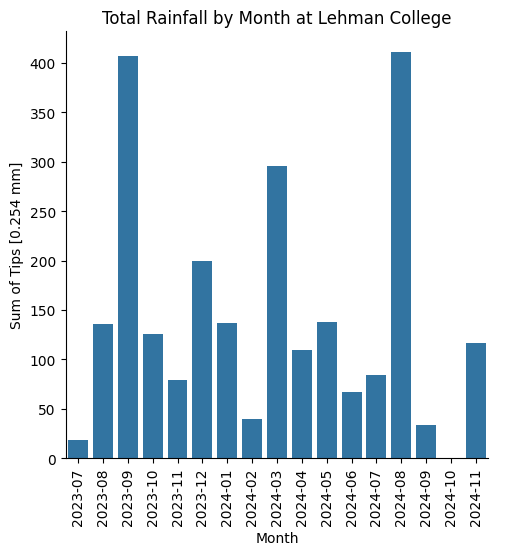

In [ ]:
Lehman_tot = sns.catplot(x = 'Month', y = 'Sum of Tips [0.254 mm]', data = monthly_sum, kind = 'bar')
Lehman_tot.set_xticklabels(rotation = 90)
plt.title('Total Rainfall by Month at Lehman College')



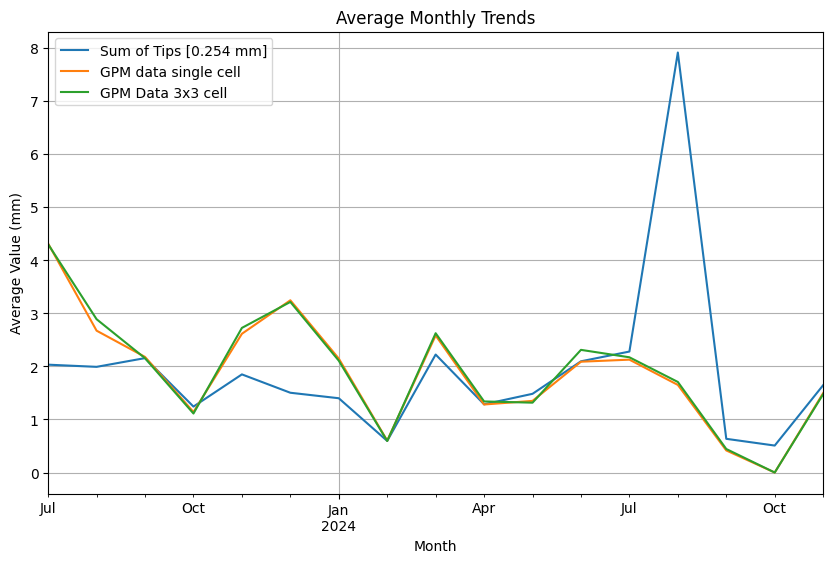

In [ ]:
monthly_avg = ds.groupby('Month')[['Sum of Tips [0.254 mm]', 'GPM data single cell', 'GPM Data 3x3 cell']].mean()
monthly_avg.plot(kind='line', figsize=(10, 6))
plt.title('Average Monthly Trends')
plt.xlabel('Month')
plt.ylabel('Average Value (mm)')
plt.grid(True)
plt.show()

In [ ]:
monthly_avg

,Sum of Tips [0.254 mm],GPM data single cell,GPM Data 3x3 cell
Month,,,
2023-07,2.032000,4.313333,4.300000
2023-08,1.990912,2.672647,2.888382
2023-09,2.155640,2.178095,2.153333
2023-10,1.242337,1.139802,1.111782
2023-11,1.848884,2.613953,2.724651
2023-12,1.502992,3.245113,3.214060
2024-01,1.399592,2.147347,2.106939
2024-02,0.595194,0.601791,0.594627
2024-03,2.222977,2.582105,2.624436


**Goal: Rainfall event can cover one day or two days, but it is a consecutive date range. It would be great to know which events (by date) produce the best and which events produce the worst results.
Doing this by filtering based on month column
**


#**Linear Regression:**
x = (Sum of tips) y = GPM data (GPM data single cell) or (GPM Data 3x3 cell). Since we are finding how well 2 variables correlate, it does not really matter which is x or y as they will produce the same R-Square. Example done  for July 2023.


Examining each month by filtering using "Month" column and then performing a regression analysis.

#July 2023


In [ ]:
july_23 = ds[ds['Month'] == '2023-07']
july_23

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
0,2023-07-24 14:00:00,0.508,3IMERG.20230724-S133000-E135959.nc4,0.30,0.26,2023-07
1,2023-07-24 15:30:00,0.508,3IMERG.20230724-S150000-E152959.nc4,0.11,0.06,2023-07
2,2023-07-25 20:00:00,3.556,3IMERG.20230725-S193000-E195959.nc4,6.14,4.54,2023-07
3,2023-07-25 20:30:00,3.302,3IMERG.20230725-S200000-E202959.nc4,8.02,7.44,2023-07
4,2023-07-25 21:00:00,0.508,3IMERG.20230725-S203000-E205959.nc4,6.33,10.86,2023-07
5,2023-07-25 21:30:00,0.254,3IMERG.20230725-S210000-E212959.nc4,13.61,7.52,2023-07
6,2023-07-28 02:00:00,8.890,3IMERG.20230728-S013000-E015959.nc4,4.13,5.98,2023-07
7,2023-07-29 23:30:00,0.508,3IMERG.20230729-S230000-E232959.nc4,0.18,2.04,2023-07
8,2023-07-30 00:00:00,0.254,3IMERG.20230730-S233000-E235959.nc4,0.00,0.00,2023-07


In [ ]:
#here y = Sum of Tips and x = GPM data single cell
lm = smf.ols("Q('Sum of Tips [0.254 mm]') ~ Q('GPM data single cell')", data=july_23).fit()
lm.summary()


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Q('Sum of Tips [0.254 mm]')   R-squared:                       0.015
Model:                                     OLS   Adj. R-squared:                 -0.126
Method:                          Least Squares   F-statistic:                    0.1037
Date:                         Wed, 07 May 2025   Prob (F-statistic):              0.757
Time:                                 16:43:38   Log-Likelihood:                -21.710
No. Observations:                            9   AIC:                             47.42
Df Residuals:                                7   BIC:                             47.81
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.7124      1.423      1.203      0.268      -1.654       5.078
Q('GPM data single cell')     0.0741      0.230      0.322      0.757      -0.470       0.618
==============================================================================
Omnibus:                       13.049   Durbin-Watson:                   2.551
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.499
Skew:                           1.693   Prob(JB):                       0.0640
Kurtosis:                       4.789   Cond. No.                         8.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#how professor does it
# y = GPM data single cell & x = Sum of Tips
july_23lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data=july_23).fit()
july_23lm.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.015
Model:                                   OLS   Adj. R-squared:                 -0.126
Method:                        Least Squares   F-statistic:                    0.1037
Date:                       Wed, 07 May 2025   Prob (F-statistic):              0.757
Time:                               16:43:38   Log-Likelihood:                -26.111
No. Observations:                          9   AIC:                             56.22
Df Residuals:                              7   BIC:                             56.62
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.9129      2.077      1.884      0.102      -0.999       8.825
Q('Sum of Tips [0.254 mm]')     0.1971      0.612      0.322      0.757      -1.250       1.644
==============================================================================
Omnibus:                        3.183   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                1.332
Skew:                           0.940   Prob(JB):                        0.514
Kurtosis:                       2.876   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
july_23lm.resid

,0
0,-3.712984
1,-3.902984
2,1.526318
3,3.456376
4,2.317016
5,9.647074
6,-1.534903
7,-3.832984
8,-3.962926


<Axes: >

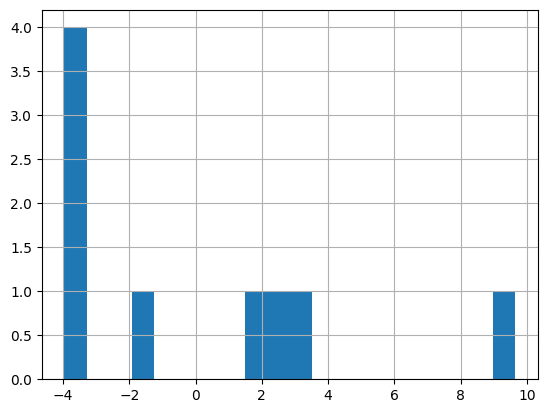

In [ ]:
july_23lm.resid.hist(bins=20)
#residuals should have a normal distribution centered at 0

Text(0.5, 1.0, 'Regression Analysis for July 2023')

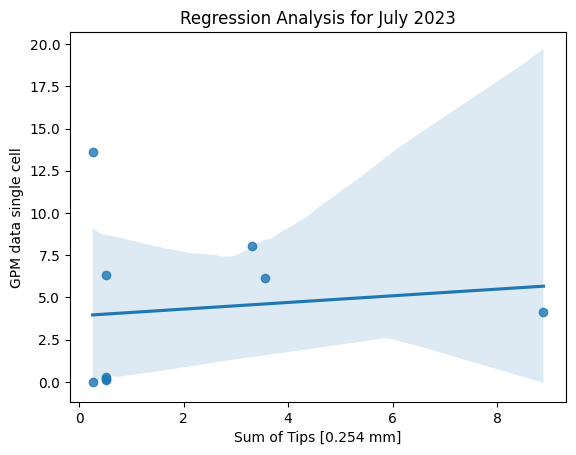

In [ ]:
sns.regplot(x= "Sum of Tips [0.254 mm]", y = "GPM data single cell", data = july_23)
plt.title('Regression Analysis for July 2023')

In [ ]:
july_23_reclm = smf.ols("Q('GPM Data 3x3 cell') ~ Q('Sum of Tips [0.254 mm]')", data=july_23).fit()
july_23_reclm.summary()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Q('GPM Data 3x3 cell')   R-squared:                       0.069
Model:                                OLS   Adj. R-squared:                 -0.064
Method:                     Least Squares   F-statistic:                    0.5183
Date:                    Wed, 07 May 2025   Prob (F-statistic):              0.495
Time:                            16:43:39   Log-Likelihood:                -24.254
No. Observations:                       9   AIC:                             52.51
Df Residuals:                           7   BIC:                             52.90
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.5718      1.690      2.113      0.072      -0.425       7.568
Q('Sum of Tips [0.254 mm]')     0.3584      0.498      0.720      0.495      -0.819       1.535
==============================================================================
Omnibus:                        1.425   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                0.932
Skew:                           0.696   Prob(JB):                        0.627
Kurtosis:                       2.259   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis for July 2023')

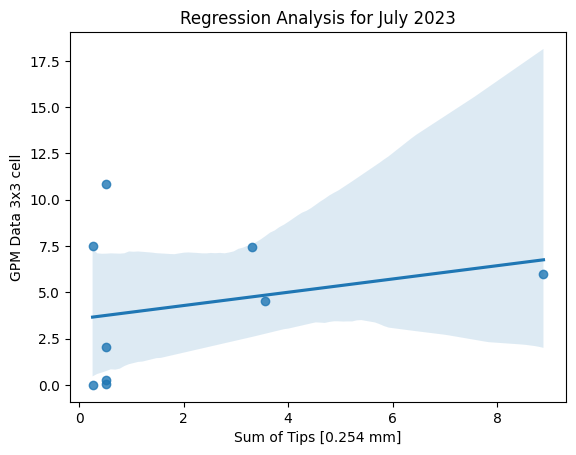

In [ ]:
sns.regplot(x= "Sum of Tips [0.254 mm]", y = "GPM Data 3x3 cell", data = july_23)
plt.title('Regression Analysis for July 2023')


# August 2023

In [ ]:
aug_23 = ds[ds['Month'] == '2023-08']
aug_23

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
9,2023-08-07 09:00:00,0.254,3IMERG.20230807-S083000-E085959.nc4,0.00,0.40,2023-08
10,2023-08-07 09:30:00,0.508,3IMERG.20230807-S090000-E092959.nc4,0.71,0.80,2023-08
11,2023-08-07 10:00:00,3.810,3IMERG.20230807-S093000-E095959.nc4,2.46,3.24,2023-08
12,2023-08-07 10:30:00,4.572,3IMERG.20230807-S100000-E102959.nc4,4.89,4.61,2023-08
13,2023-08-07 11:00:00,12.192,3IMERG.20230807-S103000-E105959.nc4,6.32,6.06,2023-08
...,...,...,...,...,...,...
72,2023-08-25 12:30:00,0.762,3IMERG.20230825-S120000-E122959.nc4,4.43,3.85,2023-08
73,2023-08-30 13:00:00,2.540,3IMERG.20230830-S123000-E125959.nc4,0.03,0.02,2023-08
74,2023-08-30 13:30:00,0.508,3IMERG.20230830-S130000-E132959.nc4,0.27,0.30,2023-08
75,2023-08-30 14:00:00,2.794,3IMERG.20230830-S133000-E135959.nc4,1.67,0.78,2023-08


In [ ]:
aug_23lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data=aug_23).fit()
aug_23lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.193
Model:                                   OLS   Adj. R-squared:                  0.181
Method:                        Least Squares   F-statistic:                     15.82
Date:                       Wed, 07 May 2025   Prob (F-statistic):           0.000176
Time:                               16:43:39   Log-Likelihood:                -176.96
No. Observations:                         68   AIC:                             357.9
Df Residuals:                             66   BIC:                             362.4
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.3983      0.514      2.720      0.008       0.372       2.425
Q('Sum of Tips [0.254 mm]')     0.6401      0.161      3.977      0.000       0.319       0.961
==============================================================================
Omnibus:                       16.409   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.137
Skew:                           1.130   Prob(JB):                     6.99e-05
Kurtosis:                       4.282   Cond. No.                         4.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis for August 2023')

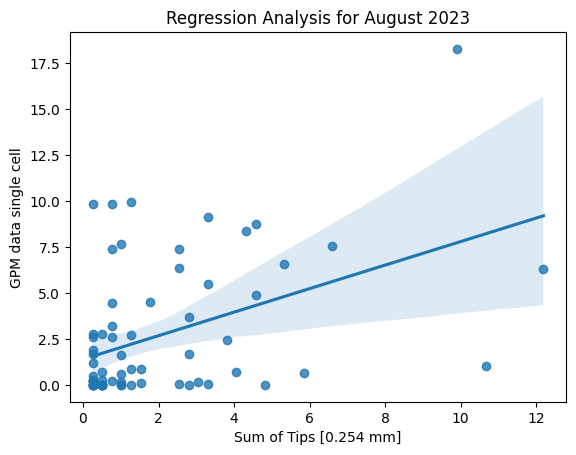

In [ ]:
sns.regplot(x= "Sum of Tips [0.254 mm]", y = "GPM data single cell", data = aug_23)
plt.title('Regression Analysis for August 2023')

In [ ]:
aug_23_reclm = smf.ols("Q('GPM Data 3x3 cell') ~ Q('Sum of Tips [0.254 mm]')", data=aug_23).fit()
aug_23_reclm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Q('GPM Data 3x3 cell')   R-squared:                       0.209
Model:                                OLS   Adj. R-squared:                  0.197
Method:                     Least Squares   F-statistic:                     17.45
Date:                    Wed, 07 May 2025   Prob (F-statistic):           8.83e-05
Time:                            16:43:40   Log-Likelihood:                -175.71
No. Observations:                      68   AIC:                             355.4
Df Residuals:                          66   BIC:                             359.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.5742      0.505      3.119      0.003       0.567       2.582
Q('Sum of Tips [0.254 mm]')     0.6601      0.158      4.178      0.000       0.345       0.976
==============================================================================
Omnibus:                       19.018   Durbin-Watson:                   0.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.376
Skew:                           1.293   Prob(JB):                     8.39e-06
Kurtosis:                       4.251   Cond. No.                         4.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis for August 2023')

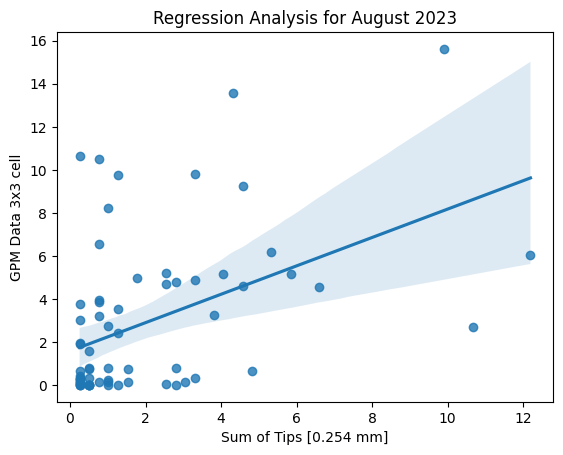

In [ ]:
sns.regplot(x= "Sum of Tips [0.254 mm]", y = "GPM Data 3x3 cell", data = aug_23)
plt.title('Regression Analysis for August 2023')

# September 2023

In [ ]:
sept_2023 = ds[ds['Month'] == '2023-09']
sept_2023

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
77,2023-09-08 05:30:00,3.556,3IMERG.20230908-S050000-E052959.nc4,0.45,1.58,2023-09
78,2023-09-08 21:30:00,1.016,3IMERG.20230908-S210000-E212959.nc4,0.00,0.04,2023-09
79,2023-09-08 22:00:00,0.254,3IMERG.20230908-S213000-E215959.nc4,0.00,0.03,2023-09
80,2023-09-08 22:30:00,0.508,3IMERG.20230908-S220000-E222959.nc4,0.75,0.37,2023-09
81,2023-09-09 14:30:00,0.254,3IMERG.20230909-S140000-E142959.nc4,0.00,0.00,2023-09
...,...,...,...,...,...,...
261,2023-09-29 22:00:00,0.254,3IMERG.20230929-S213000-E215959.nc4,3.11,4.51,2023-09
262,2023-09-30 11:00:00,0.254,3IMERG.20230930-S103000-E105959.nc4,0.00,0.00,2023-09
263,2023-09-30 12:30:00,0.254,3IMERG.20230930-S120000-E122959.nc4,0.02,0.04,2023-09
264,2023-09-30 13:00:00,0.254,3IMERG.20230930-S123000-E125959.nc4,0.08,0.34,2023-09


In [ ]:
sept_2023lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= sept_2023).fit()
sept_2023lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.070
Model:                                   OLS   Adj. R-squared:                  0.065
Method:                        Least Squares   F-statistic:                     14.06
Date:                       Wed, 07 May 2025   Prob (F-statistic):           0.000236
Time:                               16:43:40   Log-Likelihood:                -481.94
No. Observations:                        189   AIC:                             967.9
Df Residuals:                            187   BIC:                             974.4
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.6934      0.261      6.491      0.000       1.179       2.208
Q('Sum of Tips [0.254 mm]')     0.2249      0.060      3.750      0.000       0.107       0.343
==============================================================================
Omnibus:                      131.729   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1052.350
Skew:                           2.650   Prob(JB):                    3.06e-229
Kurtosis:                      13.273   Cond. No.                         5.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis for September 2023')

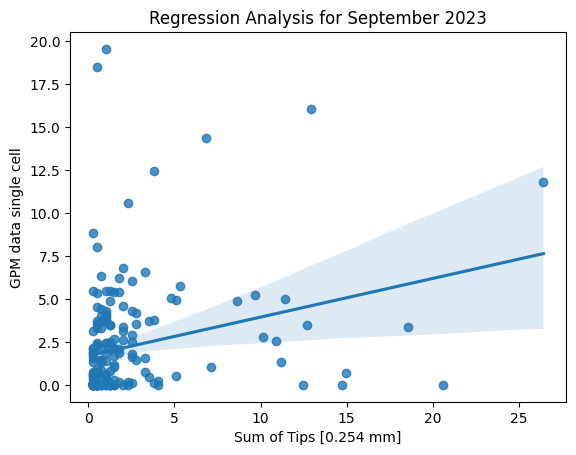

In [ ]:
sns.regplot(x= "Sum of Tips [0.254 mm]", y = "GPM data single cell", data = sept_2023)
plt.title('Regression Analysis for September 2023')

In [ ]:
sept_23reclm = smf.ols("Q('GPM Data 3x3 cell') ~ Q('Sum of Tips [0.254 mm]')", data= sept_2023).fit()
sept_23reclm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Q('GPM Data 3x3 cell')   R-squared:                       0.105
Model:                                OLS   Adj. R-squared:                  0.100
Method:                     Least Squares   F-statistic:                     21.83
Date:                    Wed, 07 May 2025   Prob (F-statistic):           5.67e-06
Time:                            16:43:41   Log-Likelihood:                -458.37
No. Observations:                     189   AIC:                             920.7
Df Residuals:                         187   BIC:                             927.2
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.6201      0.230      7.035      0.000       1.166       2.074
Q('Sum of Tips [0.254 mm]')     0.2474      0.053      4.673      0.000       0.143       0.352
==============================================================================
Omnibus:                      111.622   Durbin-Watson:                   0.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              656.598
Skew:                           2.258   Prob(JB):                    2.64e-143
Kurtosis:                      10.936   Cond. No.                         5.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis for September 2023')

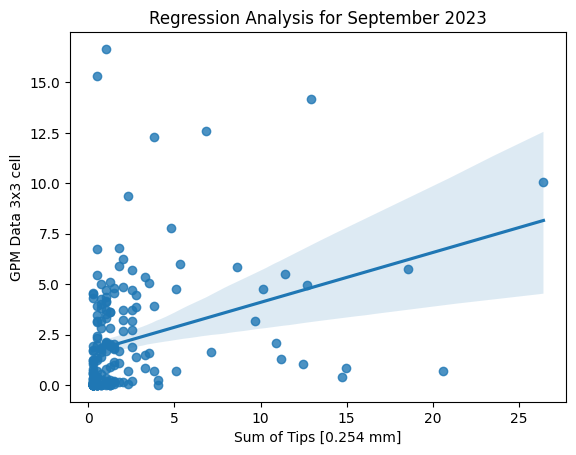

In [ ]:
sns.regplot(x= "Sum of Tips [0.254 mm]", y = "GPM Data 3x3 cell", data = sept_2023)
plt.title('Regression Analysis for September 2023')

# October 2023

In [ ]:
oct_2023 = ds[ds['Month'] == '2023-10']
oct_2023

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
266,2023-10-06 15:00:00,0.254,3IMERG.20231006-S143000-E145959.nc4,0.00,0.00,2023-10
267,2023-10-06 17:00:00,3.048,3IMERG.20231006-S163000-E165959.nc4,0.00,0.00,2023-10
268,2023-10-06 17:30:00,0.254,3IMERG.20231006-S170000-E172959.nc4,0.01,0.01,2023-10
269,2023-10-06 19:30:00,0.254,3IMERG.20231006-S190000-E192959.nc4,0.00,0.00,2023-10
270,2023-10-06 20:30:00,0.254,3IMERG.20231006-S200000-E202959.nc4,0.00,0.01,2023-10
...,...,...,...,...,...,...
362,2023-10-30 09:30:00,3.302,3IMERG.20231030-S090000-E092959.nc4,1.02,1.41,2023-10
363,2023-10-30 10:00:00,3.810,3IMERG.20231030-S093000-E095959.nc4,6.57,3.31,2023-10
364,2023-10-30 10:30:00,3.048,3IMERG.20231030-S100000-E102959.nc4,2.05,3.41,2023-10
365,2023-10-30 11:00:00,2.032,3IMERG.20231030-S103000-E105959.nc4,0.48,0.61,2023-10


In [ ]:
oct_2023lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= oct_2023).fit()
oct_2023lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.053
Model:                                   OLS   Adj. R-squared:                  0.044
Method:                        Least Squares   F-statistic:                     5.555
Date:                       Wed, 07 May 2025   Prob (F-statistic):             0.0204
Time:                               16:43:41   Log-Likelihood:                -184.36
No. Observations:                        101   AIC:                             372.7
Df Residuals:                             99   BIC:                             378.0
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.8195      0.203      4.036      0.000       0.417       1.222
Q('Sum of Tips [0.254 mm]')     0.2578      0.109      2.357      0.020       0.041       0.475
==============================================================================
Omnibus:                       30.950   Durbin-Watson:                   0.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.240
Skew:                           1.477   Prob(JB):                     9.10e-11
Kurtosis:                       4.502   Cond. No.                         2.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis for October 2023')

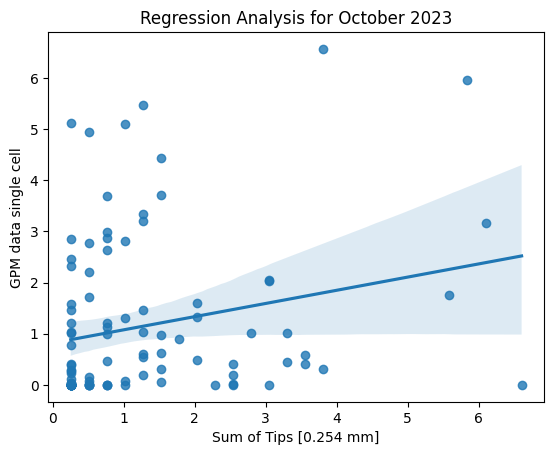

In [ ]:
sns.regplot(x= "Sum of Tips [0.254 mm]", y = "GPM data single cell", data = oct_2023)
plt.title('Regression Analysis for October 2023')

# November 2023

In [ ]:
nov_2023 = ds[ds['Month']== '2023-11']
nov_2023

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
367,2023-11-01 10:00:00,0.254,3IMERG.20231101-S093000-E095959.nc4,0.00,0.00,2023-11
368,2023-11-01 12:00:00,0.254,3IMERG.20231101-S113000-E115959.nc4,0.00,0.00,2023-11
369,2023-11-07 09:30:00,0.762,3IMERG.20231107-S090000-E092959.nc4,4.33,5.39,2023-11
370,2023-11-07 10:00:00,1.270,3IMERG.20231107-S093000-E095959.nc4,1.63,4.07,2023-11
371,2023-11-07 10:30:00,0.508,3IMERG.20231107-S100000-E102959.nc4,1.57,2.08,2023-11
372,2023-11-07 11:00:00,0.254,3IMERG.20231107-S103000-E105959.nc4,1.32,1.13,2023-11
373,2023-11-21 20:30:00,0.254,3IMERG.20231121-S200000-E202959.nc4,6.13,5.02,2023-11
374,2023-11-21 21:00:00,0.508,3IMERG.20231121-S203000-E205959.nc4,5.14,5.26,2023-11
375,2023-11-21 21:30:00,0.508,3IMERG.20231121-S210000-E212959.nc4,5.41,4.90,2023-11
376,2023-11-21 22:00:00,0.254,3IMERG.20231121-S213000-E215959.nc4,3.95,3.67,2023-11


In [ ]:
nov_23lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= nov_2023).fit()
nov_23lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.002
Model:                                   OLS   Adj. R-squared:                 -0.023
Method:                        Least Squares   F-statistic:                   0.06596
Date:                       Wed, 07 May 2025   Prob (F-statistic):              0.799
Time:                               16:43:42   Log-Likelihood:                -102.53
No. Observations:                         43   AIC:                             209.1
Df Residuals:                             41   BIC:                             212.6
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.5177      0.556      4.531      0.000       1.396       3.640
Q('Sum of Tips [0.254 mm]')     0.0521      0.203      0.257      0.799      -0.357       0.461
==============================================================================
Omnibus:                       22.506   Durbin-Watson:                   0.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.793
Skew:                           1.576   Prob(JB):                     2.78e-08
Kurtosis:                       6.079   Cond. No.                         3.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis for November 2023')

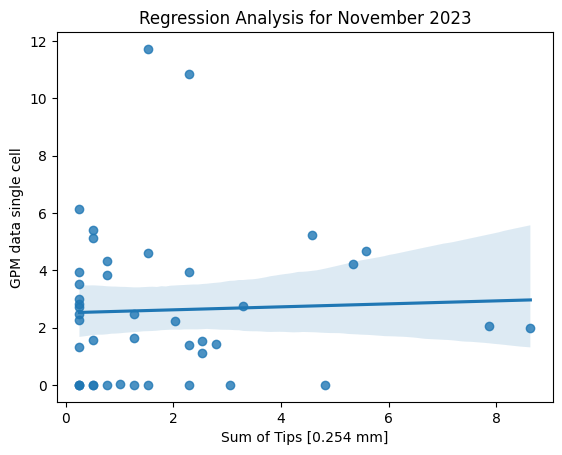

In [ ]:
sns.regplot(x= "Sum of Tips [0.254 mm]", y = "GPM data single cell", data = nov_2023)
plt.title('Regression Analysis for November 2023')

# December 2023

In [ ]:
dec_23 = ds[ds['Month']== '2023-12']
dec_23

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
410,2023-12-01 18:00:00,0.254,3IMERG.20231201-S173000-E175959.nc4,5.62,4.59,2023-12
411,2023-12-01 18:30:00,0.254,3IMERG.20231201-S180000-E182959.nc4,3.23,2.47,2023-12
412,2023-12-01 22:00:00,0.762,3IMERG.20231201-S213000-E215959.nc4,6.33,4.86,2023-12
413,2023-12-01 22:30:00,0.762,3IMERG.20231201-S220000-E222959.nc4,3.69,3.62,2023-12
414,2023-12-01 23:00:00,0.762,3IMERG.20231201-S223000-E225959.nc4,1.34,1.58,2023-12
...,...,...,...,...,...,...
538,2023-12-29 03:00:00,0.254,3IMERG.20231229-S023000-E025959.nc4,0.01,0.00,2023-12
539,2023-12-29 03:30:00,0.254,3IMERG.20231229-S030000-E032959.nc4,0.00,0.02,2023-12
540,2023-12-29 06:30:00,0.508,3IMERG.20231229-S060000-E062959.nc4,0.00,0.00,2023-12
541,2023-12-29 08:00:00,0.254,3IMERG.20231229-S073000-E075959.nc4,0.00,0.00,2023-12


In [ ]:
dec_23lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= dec_23).fit()
dec_23lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.278
Model:                                   OLS   Adj. R-squared:                  0.272
Method:                        Least Squares   F-statistic:                     50.42
Date:                       Wed, 07 May 2025   Prob (F-statistic):           7.08e-11
Time:                               16:43:42   Log-Likelihood:                -339.48
No. Observations:                        133   AIC:                             683.0
Df Residuals:                            131   BIC:                             688.7
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.6226      0.355      4.573      0.000       0.921       2.324
Q('Sum of Tips [0.254 mm]')     1.0795      0.152      7.101      0.000       0.779       1.380
==============================================================================
Omnibus:                       13.069   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.391
Skew:                           0.372   Prob(JB):                     1.86e-06
Kurtosis:                       5.052   Cond. No.                         3.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis December 2023')

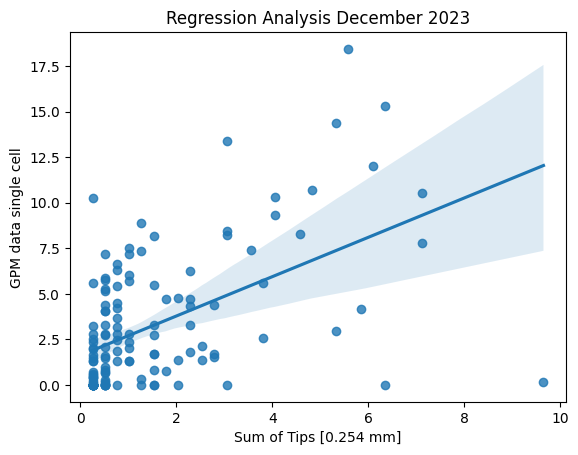

In [ ]:
sns.regplot(x= "Sum of Tips [0.254 mm]", y = "GPM data single cell", data = dec_23)
plt.title("Regression Analysis December 2023")

# January 2024

In [ ]:
jan_2024 = ds[ds['Month']== '2024-01']
jan_2024

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
543,2024-01-06 22:00:00,0.762,3IMERG.20240106-S213000-E215959.nc4,0.21,0.51,2024-01
544,2024-01-06 22:30:00,1.270,3IMERG.20240106-S220000-E222959.nc4,0.56,0.61,2024-01
545,2024-01-06 23:00:00,1.270,3IMERG.20240106-S223000-E225959.nc4,0.31,0.42,2024-01
546,2024-01-06 23:30:00,1.270,3IMERG.20240106-S230000-E232959.nc4,2.27,1.75,2024-01
547,2024-01-07 00:00:00,6.350,3IMERG.20240107-S233000-E235959.nc4,0.00,0.00,2024-01
...,...,...,...,...,...,...
636,2024-01-26 10:30:00,0.508,3IMERG.20240126-S100000-E102959.nc4,0.20,0.10,2024-01
637,2024-01-26 11:00:00,0.254,3IMERG.20240126-S103000-E105959.nc4,0.00,0.00,2024-01
638,2024-01-26 12:00:00,0.254,3IMERG.20240126-S113000-E115959.nc4,0.00,0.00,2024-01
639,2024-01-26 12:30:00,0.254,3IMERG.20240126-S120000-E122959.nc4,0.00,0.00,2024-01


In [ ]:
jan_2024lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= jan_2024).fit()
jan_2024lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.050
Model:                                   OLS   Adj. R-squared:                  0.040
Method:                        Least Squares   F-statistic:                     5.010
Date:                       Wed, 07 May 2025   Prob (F-statistic):             0.0275
Time:                               16:43:43   Log-Likelihood:                -276.02
No. Observations:                         98   AIC:                             556.0
Df Residuals:                             96   BIC:                             561.2
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.5746      0.486      3.242      0.002       0.610       2.539
Q('Sum of Tips [0.254 mm]')     0.4092      0.183      2.238      0.028       0.046       0.772
==============================================================================
Omnibus:                       72.234   Durbin-Watson:                   1.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.749
Skew:                           2.509   Prob(JB):                     1.03e-79
Kurtosis:                      10.993   Cond. No.                         3.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis January 2024')

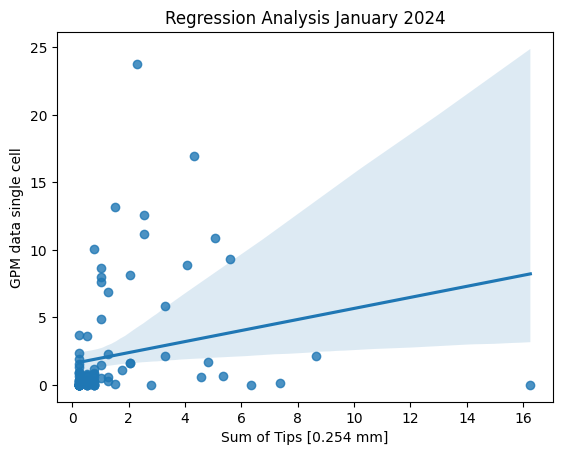

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM data single cell", data = jan_2024)
plt.title("Regression Analysis January 2024")

# February 2024

In [ ]:
feb_2024 = ds[ds['Month']== '2024-02']
feb_2024

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
641,2024-02-02 06:00:00,0.254,3IMERG.20240202-S053000-E055959.nc4,1.13,1.37,2024-02
642,2024-02-02 06:30:00,1.270,3IMERG.20240202-S060000-E062959.nc4,3.56,2.06,2024-02
643,2024-02-02 07:00:00,0.762,3IMERG.20240202-S063000-E065959.nc4,0.82,1.37,2024-02
644,2024-02-02 07:30:00,0.508,3IMERG.20240202-S070000-E072959.nc4,1.06,0.98,2024-02
645,2024-02-02 08:00:00,0.508,3IMERG.20240202-S073000-E075959.nc4,0.93,1.03,2024-02
...,...,...,...,...,...,...
703,2024-02-28 23:00:00,0.254,3IMERG.20240228-S223000-E225959.nc4,0.00,0.26,2024-02
704,2024-02-29 02:00:00,0.508,3IMERG.20240229-S013000-E015959.nc4,2.14,1.87,2024-02
705,2024-02-29 02:30:00,0.254,3IMERG.20240229-S020000-E022959.nc4,0.37,0.61,2024-02
706,2024-02-29 03:00:00,0.762,3IMERG.20240229-S023000-E025959.nc4,0.64,0.69,2024-02


In [ ]:
feb_24lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= feb_2024).fit()
feb_24lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.050
Model:                                   OLS   Adj. R-squared:                  0.036
Method:                        Least Squares   F-statistic:                     3.442
Date:                       Wed, 07 May 2025   Prob (F-statistic):             0.0681
Time:                               16:43:43   Log-Likelihood:                -103.81
No. Observations:                         67   AIC:                             211.6
Df Residuals:                             65   BIC:                             216.0
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.3624      0.191      1.893      0.063      -0.020       0.745
Q('Sum of Tips [0.254 mm]')     0.4023      0.217      1.855      0.068      -0.031       0.835
==============================================================================
Omnibus:                       71.572   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              577.293
Skew:                           3.120   Prob(JB):                    4.39e-126
Kurtosis:                      15.956   Cond. No.                         2.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis February 2024')

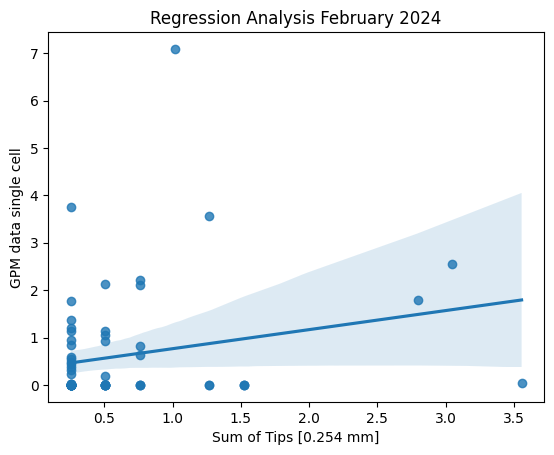

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM data single cell", data = feb_2024)
plt.title("Regression Analysis February 2024")

# March 2024


In [ ]:
march_2024 = ds[ds['Month']== '2024-03']
march_2024

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
708,2024-03-02 13:00:00,0.254,3IMERG.20240302-S123000-E125959.nc4,1.20,0.94,2024-03
709,2024-03-02 14:30:00,0.508,3IMERG.20240302-S140000-E142959.nc4,1.59,1.61,2024-03
710,2024-03-02 15:00:00,0.762,3IMERG.20240302-S143000-E145959.nc4,1.59,1.50,2024-03
711,2024-03-02 15:30:00,0.254,3IMERG.20240302-S150000-E152959.nc4,1.68,1.51,2024-03
712,2024-03-02 16:00:00,0.254,3IMERG.20240302-S153000-E155959.nc4,1.70,1.72,2024-03
...,...,...,...,...,...,...
836,2024-03-28 23:30:00,0.254,3IMERG.20240328-S230000-E232959.nc4,0.81,1.01,2024-03
837,2024-03-29 00:00:00,0.508,3IMERG.20240329-S233000-E235959.nc4,0.00,0.00,2024-03
838,2024-03-29 01:30:00,0.254,3IMERG.20240329-S010000-E012959.nc4,1.96,1.82,2024-03
839,2024-03-29 02:00:00,0.254,3IMERG.20240329-S013000-E015959.nc4,2.40,2.24,2024-03


In [ ]:
mar_24lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= march_2024).fit()
mar_24lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.011
Model:                                   OLS   Adj. R-squared:                  0.003
Method:                        Least Squares   F-statistic:                     1.438
Date:                       Wed, 07 May 2025   Prob (F-statistic):              0.233
Time:                               16:43:44   Log-Likelihood:                -325.19
No. Observations:                        133   AIC:                             654.4
Df Residuals:                            131   BIC:                             660.2
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.4309      0.274      8.857      0.000       1.888       2.974
Q('Sum of Tips [0.254 mm]')     0.0680      0.057      1.199      0.233      -0.044       0.180
==============================================================================
Omnibus:                       23.380   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.634
Skew:                           1.130   Prob(JB):                     3.67e-07
Kurtosis:                       3.490   Cond. No.                         5.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis March 2024')

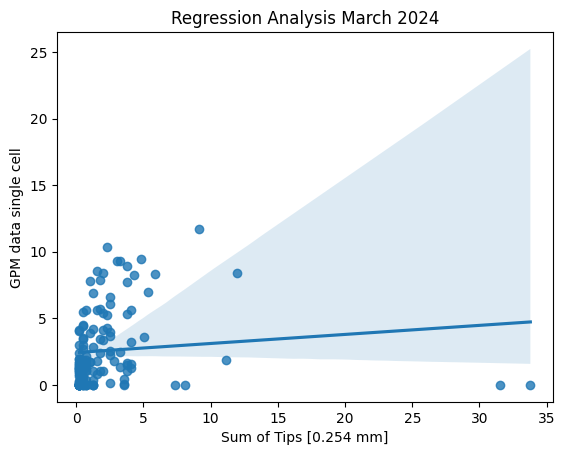

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM data single cell", data = march_2024)
plt.title("Regression Analysis March 2024")

# April 2024

In [ ]:
apr_2024 = ds[ds['Month']== '2024-04']
apr_2024

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
841,2024-04-01 15:30:00,0.254,3IMERG.20240401-S150000-E152959.nc4,0.80,1.12,2024-04
842,2024-04-01 16:30:00,0.254,3IMERG.20240401-S160000-E162959.nc4,0.96,2.29,2024-04
843,2024-04-02 11:00:00,0.254,3IMERG.20240402-S103000-E105959.nc4,0.81,0.68,2024-04
844,2024-04-02 11:30:00,0.254,3IMERG.20240402-S110000-E112959.nc4,0.97,0.92,2024-04
845,2024-04-02 13:00:00,0.254,3IMERG.20240402-S123000-E125959.nc4,0.01,0.01,2024-04
...,...,...,...,...,...,...
921,2024-04-20 10:30:00,0.254,3IMERG.20240420-S100000-E102959.nc4,0.18,0.34,2024-04
922,2024-04-20 11:00:00,1.778,3IMERG.20240420-S103000-E105959.nc4,0.05,0.07,2024-04
923,2024-04-20 11:30:00,0.508,3IMERG.20240420-S110000-E112959.nc4,0.20,0.26,2024-04
924,2024-04-20 15:00:00,0.254,3IMERG.20240420-S143000-E145959.nc4,0.00,0.01,2024-04


In [ ]:
apr_24lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= apr_2024).fit()
apr_24lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.016
Model:                                   OLS   Adj. R-squared:                  0.004
Method:                        Least Squares   F-statistic:                     1.362
Date:                       Wed, 07 May 2025   Prob (F-statistic):              0.246
Time:                               16:43:44   Log-Likelihood:                -180.95
No. Observations:                         85   AIC:                             365.9
Df Residuals:                             83   BIC:                             370.8
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.1522      0.249      4.622      0.000       0.656       1.648
Q('Sum of Tips [0.254 mm]')     0.1008      0.086      1.167      0.246      -0.071       0.273
==============================================================================
Omnibus:                       66.870   Durbin-Watson:                   0.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.459
Skew:                           2.520   Prob(JB):                     8.80e-79
Kurtosis:                      11.723   Cond. No.                         3.31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis April 2024')

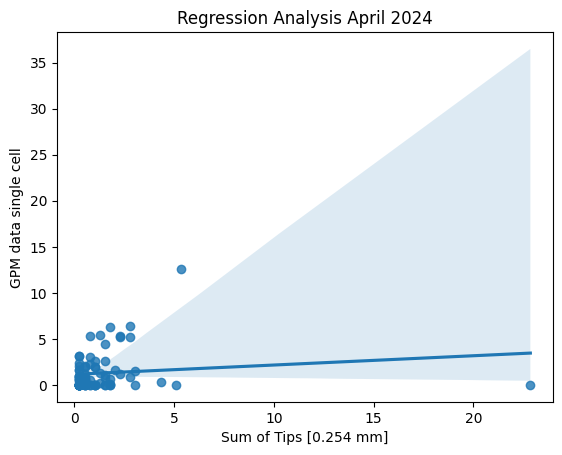

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM data single cell", data = apr_2024)
plt.title("Regression Analysis April 2024")

# May 2024

In [ ]:
may_24 = ds[ds['Month']== '2024-05']
may_24

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
926,2024-05-01 06:00:00,0.254,3IMERG.20240501-S053000-E055959.nc4,1.30,1.17,2024-05
927,2024-05-01 06:30:00,0.254,3IMERG.20240501-S060000-E062959.nc4,1.43,1.17,2024-05
928,2024-05-05 16:00:00,0.254,3IMERG.20240505-S153000-E155959.nc4,0.77,0.54,2024-05
929,2024-05-05 18:30:00,0.762,3IMERG.20240505-S180000-E182959.nc4,1.19,1.54,2024-05
930,2024-05-05 19:00:00,1.270,3IMERG.20240505-S183000-E185959.nc4,2.72,2.91,2024-05
...,...,...,...,...,...,...
1014,2024-05-30 06:00:00,0.254,3IMERG.20240530-S053000-E055959.nc4,0.44,0.25,2024-05
1015,2024-05-30 08:30:00,0.254,3IMERG.20240530-S080000-E082959.nc4,0.00,0.13,2024-05
1016,2024-05-30 09:00:00,1.270,3IMERG.20240530-S083000-E085959.nc4,0.10,0.42,2024-05
1017,2024-05-30 09:30:00,2.540,3IMERG.20240530-S090000-E092959.nc4,1.29,0.54,2024-05


In [ ]:
may_24lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= may_24).fit()
may_24lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.290
Model:                                   OLS   Adj. R-squared:                  0.283
Method:                        Least Squares   F-statistic:                     37.25
Date:                       Wed, 07 May 2025   Prob (F-statistic):           2.50e-08
Time:                               16:43:45   Log-Likelihood:                -199.54
No. Observations:                         93   AIC:                             403.1
Df Residuals:                             91   BIC:                             408.1
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.7264      0.240      3.031      0.003       0.250       1.202
Q('Sum of Tips [0.254 mm]')     0.4203      0.069      6.103      0.000       0.283       0.557
==============================================================================
Omnibus:                      119.739   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3174.308
Skew:                           4.206   Prob(JB):                         0.00
Kurtosis:                      30.357   Cond. No.                         3.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis May 2024')

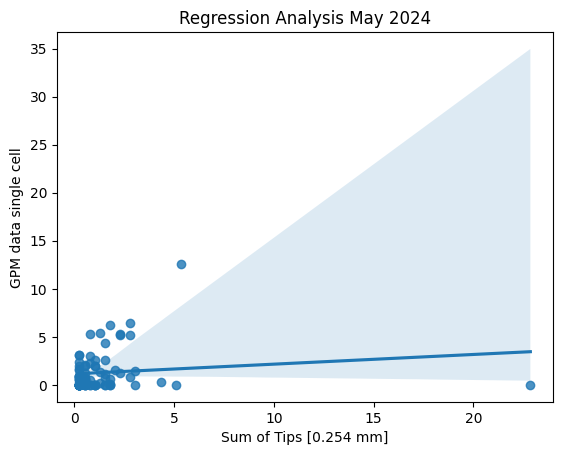

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM data single cell", data= apr_2024)
plt.title("Regression Analysis May 2024")

# June 2024

In [ ]:
jun_2024 = ds[ds['Month'] == '2024-06']
jun_2024

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
1019,2024-06-06 05:30:00,2.032,3IMERG.20240606-S050000-E052959.nc4,0.76,0.63,2024-06
1020,2024-06-06 06:00:00,0.254,3IMERG.20240606-S053000-E055959.nc4,1.61,1.44,2024-06
1021,2024-06-06 07:00:00,1.524,3IMERG.20240606-S063000-E065959.nc4,0.49,0.64,2024-06
1022,2024-06-06 07:30:00,0.254,3IMERG.20240606-S070000-E072959.nc4,0.35,0.65,2024-06
1023,2024-06-06 08:00:00,1.270,3IMERG.20240606-S073000-E075959.nc4,0.17,0.35,2024-06
1024,2024-06-06 08:30:00,0.254,3IMERG.20240606-S080000-E082959.nc4,1.42,1.33,2024-06
1025,2024-06-06 09:00:00,2.540,3IMERG.20240606-S083000-E085959.nc4,1.20,2.31,2024-06
1026,2024-06-06 09:30:00,2.540,3IMERG.20240606-S090000-E092959.nc4,1.99,2.74,2024-06
1027,2024-06-06 10:00:00,1.016,3IMERG.20240606-S093000-E095959.nc4,2.95,2.19,2024-06
1028,2024-06-06 19:30:00,10.160,3IMERG.20240606-S190000-E192959.nc4,2.34,1.57,2024-06


In [ ]:
jun_24lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= jun_2024).fit()
jun_24lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.025
Model:                                   OLS   Adj. R-squared:                 -0.008
Method:                        Least Squares   F-statistic:                    0.7673
Date:                       Wed, 07 May 2025   Prob (F-statistic):              0.388
Time:                               16:43:46   Log-Likelihood:                -70.574
No. Observations:                         32   AIC:                             145.1
Df Residuals:                             30   BIC:                             148.1
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.7747      0.537      3.304      0.002       0.678       2.872
Q('Sum of Tips [0.254 mm]')     0.1494      0.171      0.876      0.388      -0.199       0.498
==============================================================================
Omnibus:                       10.345   Durbin-Watson:                   1.165
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                9.808
Skew:                           1.333   Prob(JB):                      0.00742
Kurtosis:                       3.494   Cond. No.                         4.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis June 2024')

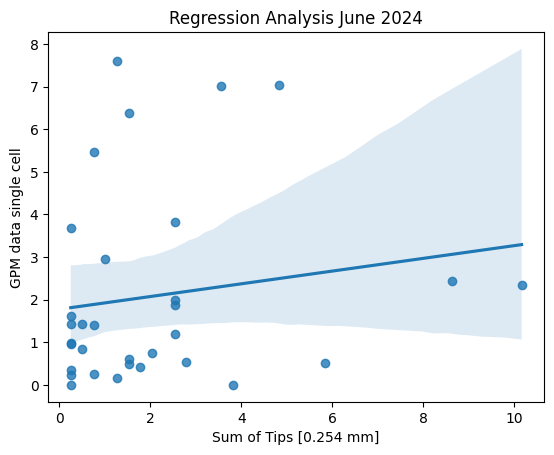

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM data single cell", data = jun_2024)
plt.title("Regression Analysis June 2024")

# July 2024

In [ ]:
july_2024 = ds[ds['Month'] == '2024-07']
july_2024

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
1051,2024-07-05 04:00:00,0.508,3IMERG.20240705-S033000-E035959.nc4,3.63,5.70,2024-07
1052,2024-07-06 00:30:00,1.270,3IMERG.20240706-S000000-E002959.nc4,0.00,0.25,2024-07
1053,2024-07-06 04:00:00,0.254,3IMERG.20240706-S033000-E035959.nc4,0.00,0.00,2024-07
1054,2024-07-06 11:00:00,6.096,3IMERG.20240706-S103000-E105959.nc4,1.78,1.71,2024-07
1055,2024-07-06 11:30:00,0.254,3IMERG.20240706-S110000-E112959.nc4,0.92,1.73,2024-07
1056,2024-07-06 12:00:00,0.254,3IMERG.20240706-S113000-E115959.nc4,0.00,0.04,2024-07
1057,2024-07-06 12:30:00,14.478,3IMERG.20240706-S120000-E122959.nc4,0.14,1.01,2024-07
1058,2024-07-11 07:00:00,0.254,3IMERG.20240711-S063000-E065959.nc4,0.25,0.48,2024-07
1059,2024-07-11 09:30:00,0.254,3IMERG.20240711-S090000-E092959.nc4,4.63,3.47,2024-07
1060,2024-07-12 12:30:00,0.508,3IMERG.20240712-S120000-E122959.nc4,1.62,3.26,2024-07


In [ ]:
july_24lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= july_2024).fit()
july_24lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.049
Model:                                   OLS   Adj. R-squared:                  0.022
Method:                        Least Squares   F-statistic:                     1.812
Date:                       Wed, 07 May 2025   Prob (F-statistic):              0.187
Time:                               16:43:46   Log-Likelihood:                -100.10
No. Observations:                         37   AIC:                             204.2
Df Residuals:                             35   BIC:                             207.4
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.5644      0.741      2.112      0.042       0.060       3.068
Q('Sum of Tips [0.254 mm]')     0.2466      0.183      1.346      0.187      -0.125       0.619
==============================================================================
Omnibus:                       35.655   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.641
Skew:                           2.349   Prob(JB):                     2.81e-21
Kurtosis:                       9.270   Cond. No.                         4.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis July 2024')

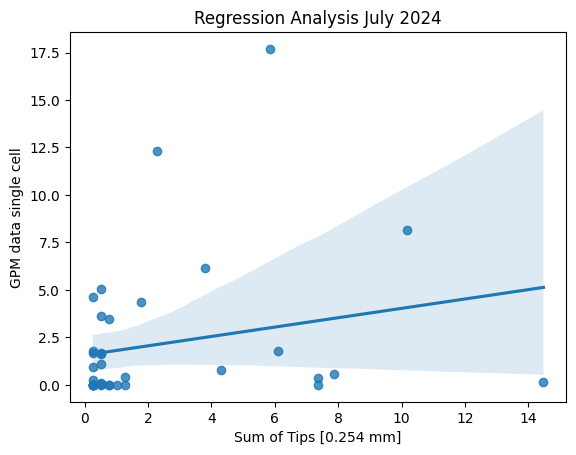

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM data single cell", data = july_2024)
plt.title("Regression Analysis July 2024")

# August 2024

In [ ]:
aug_2024 = ds[ds['Month'] == '2024-08']
aug_2024

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
1088,2024-08-01 01:30:00,1.270,3IMERG.20240801-S010000-E012959.nc4,0.00,0.04,2024-08
1089,2024-08-01 02:00:00,5.080,3IMERG.20240801-S013000-E015959.nc4,0.79,0.86,2024-08
1090,2024-08-01 02:30:00,0.254,3IMERG.20240801-S020000-E022959.nc4,0.75,1.08,2024-08
1091,2024-08-02 23:00:00,0.762,3IMERG.20240802-S223000-E225959.nc4,6.98,6.21,2024-08
1092,2024-08-02 23:30:00,13.716,3IMERG.20240802-S230000-E232959.nc4,6.43,11.67,2024-08
1093,2024-08-03 21:30:00,23.622,3IMERG.20240803-S210000-E212959.nc4,0.00,2.51,2024-08
1094,2024-08-03 22:00:00,6.096,3IMERG.20240803-S213000-E215959.nc4,0.29,3.27,2024-08
1095,2024-08-03 22:30:00,1.270,3IMERG.20240803-S220000-E222959.nc4,7.59,2.27,2024-08
1096,2024-08-04 00:00:00,31.242,3IMERG.20240804-S233000-E235959.nc4,1.79,1.35,2024-08
1097,2024-08-06 21:00:00,18.796,3IMERG.20240806-S203000-E205959.nc4,0.00,0.08,2024-08


In [ ]:
aug_24lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= aug_2024).fit()
aug_24lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                 -0.020
Method:                        Least Squares   F-statistic:                 0.0002824
Date:                       Wed, 07 May 2025   Prob (F-statistic):              0.987
Time:                               16:43:46   Log-Likelihood:                -120.04
No. Observations:                         52   AIC:                             244.1
Df Residuals:                             50   BIC:                             248.0
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.6482      0.376      4.378      0.000       0.892       2.404
Q('Sum of Tips [0.254 mm]')     0.0003      0.019      0.017      0.987      -0.038       0.039
==============================================================================
Omnibus:                       19.636   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.750
Skew:                           1.593   Prob(JB):                     4.22e-06
Kurtosis:                       4.128   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis August 2024')

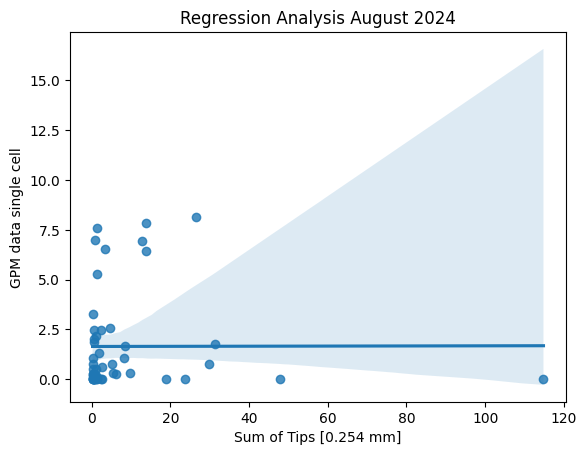

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM data single cell", data = aug_2024)
plt.title("Regression Analysis August 2024")

# September 2024

In [ ]:
sept_2024 = ds[ds['Month'] == '2024-09']
sept_2024

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
1140,2024-09-07 13:00:00,0.254,3IMERG.20240907-S123000-E125959.nc4,0.00,0.00,2024-09
1141,2024-09-07 15:00:00,0.254,3IMERG.20240907-S143000-E145959.nc4,0.00,0.00,2024-09
1142,2024-09-07 20:00:00,1.778,3IMERG.20240907-S193000-E195959.nc4,0.00,0.00,2024-09
1143,2024-09-07 20:30:00,10.668,3IMERG.20240907-S200000-E202959.nc4,0.00,0.00,2024-09
1144,2024-09-26 14:30:00,0.762,3IMERG.20240926-S140000-E142959.nc4,4.81,5.05,2024-09
1145,2024-09-26 15:00:00,0.508,3IMERG.20240926-S143000-E145959.nc4,5.12,5.76,2024-09
1146,2024-09-26 15:30:00,0.254,3IMERG.20240926-S150000-E152959.nc4,5.48,6.24,2024-09
1147,2024-09-26 16:00:00,0.254,3IMERG.20240926-S153000-E155959.nc4,2.68,3.69,2024-09
1148,2024-09-26 16:30:00,0.254,3IMERG.20240926-S160000-E162959.nc4,3.53,2.26,2024-09
1149,2024-09-27 11:00:00,0.254,3IMERG.20240927-S103000-E105959.nc4,0.00,0.00,2024-09


In [ ]:
sept_24lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= sept_2024).fit()
sept_24lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.002
Model:                                   OLS   Adj. R-squared:                 -0.018
Method:                        Least Squares   F-statistic:                    0.1036
Date:                       Wed, 07 May 2025   Prob (F-statistic):              0.749
Time:                               16:43:47   Log-Likelihood:                -88.004
No. Observations:                         52   AIC:                             180.0
Df Residuals:                             50   BIC:                             183.9
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.4421      0.203      2.177      0.034       0.034       0.850
Q('Sum of Tips [0.254 mm]')    -0.0414      0.129     -0.322      0.749      -0.300       0.217
==============================================================================
Omnibus:                       53.270   Durbin-Watson:                   0.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.439
Skew:                           3.007   Prob(JB):                     2.99e-44
Kurtosis:                      10.506   Cond. No.                         1.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis September 2024')

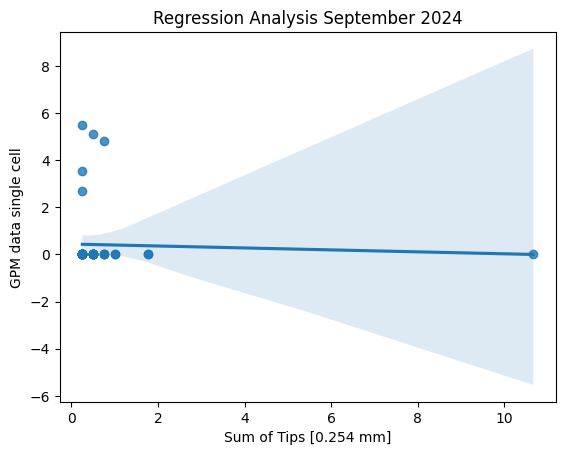

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM data single cell", data = sept_2024)
plt.title("Regression Analysis September 2024")

# October 2024

In [ ]:
oct_2024 = ds[ds['Month'] == '2024-10']
oct_2024
#No october data

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
1192,2024-10-07 10:00:00,0.508,3IMERG.20241007-S093000-E095959.nc4,0.0,0.0,2024-10


# November 2024

In [ ]:
nov_2024 = ds[ds["Month"] == "2024-11"]
nov_2024

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month
1193,2024-11-11 03:30:00,0.762,3IMERG.20241111-S030000-E032959.nc4,1.17,1.20,2024-11
1194,2024-11-11 04:00:00,0.254,3IMERG.20241111-S033000-E035959.nc4,0.39,0.34,2024-11
1195,2024-11-11 04:30:00,0.508,3IMERG.20241111-S040000-E042959.nc4,0.00,0.16,2024-11
1196,2024-11-11 05:00:00,0.254,3IMERG.20241111-S043000-E045959.nc4,0.43,0.61,2024-11
1197,2024-11-11 05:30:00,0.254,3IMERG.20241111-S050000-E052959.nc4,0.21,0.39,2024-11
...,...,...,...,...,...,...
1259,2024-11-28 17:00:00,1.270,3IMERG.20241128-S163000-E165959.nc4,4.46,4.13,2024-11
1260,2024-11-28 17:30:00,1.524,3IMERG.20241128-S170000-E172959.nc4,6.74,5.22,2024-11
1261,2024-11-28 18:00:00,0.254,3IMERG.20241128-S173000-E175959.nc4,1.55,1.83,2024-11
1262,2024-11-28 18:30:00,0.254,3IMERG.20241128-S180000-E182959.nc4,0.19,0.16,2024-11


In [ ]:
nov_24lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= nov_2024).fit()
nov_24lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.004
Model:                                   OLS   Adj. R-squared:                 -0.010
Method:                        Least Squares   F-statistic:                    0.3102
Date:                       Wed, 07 May 2025   Prob (F-statistic):              0.579
Time:                               16:43:47   Log-Likelihood:                -152.42
No. Observations:                         71   AIC:                             308.8
Df Residuals:                             69   BIC:                             313.4
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.5466      0.265      5.831      0.000       1.017       2.076
Q('Sum of Tips [0.254 mm]')    -0.0307      0.055     -0.557      0.579      -0.141       0.079
==============================================================================
Omnibus:                       26.719   Durbin-Watson:                   1.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.091
Skew:                           1.605   Prob(JB):                     3.25e-09
Kurtosis:                       4.707   Cond. No.                         5.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis November 2024')

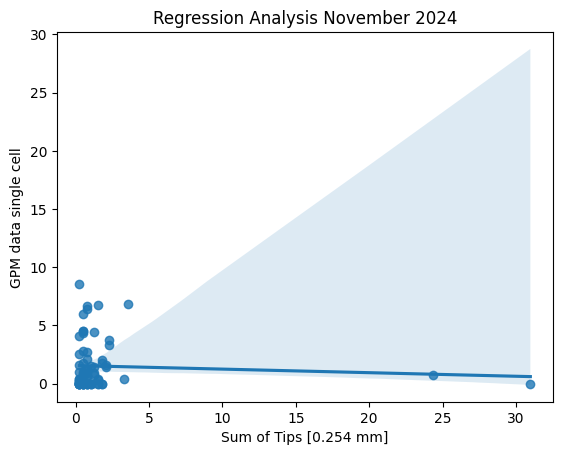

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM data single cell", data = nov_2024)
plt.title("Regression Analysis November 2024")


Dataframe with each month and its corresponding R-squared.

In [ ]:
Rsq_values = []

for month in ds['Month'].unique():
    # Filter data for the current month
    monthly_data = ds[ds['Month'] == month]

    # Perform linear regression
    model = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data=monthly_data).fit()

    # Append the results to the list
    Rsq_values.append([month, model.rsquared])

results_df = pd.DataFrame(Rsq_values, columns=['Month', 'R-squared'])
results_df

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Month,R-squared
0,2023-07,0.014605
1,2023-08,0.193346
2,2023-09,0.069927
3,2023-10,0.053132
4,2023-11,0.001606
5,2023-12,0.277908
6,2024-01,0.049596
7,2024-02,0.050285
8,2024-03,0.010860
9,2024-04,0.016149


# **overall** linear regression

In [ ]:
lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= ds).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.019
Model:                                   OLS   Adj. R-squared:                  0.019
Method:                        Least Squares   F-statistic:                     24.98
Date:                       Wed, 07 May 2025   Prob (F-statistic):           6.61e-07
Time:                               16:43:48   Log-Likelihood:                -3163.3
No. Observations:                       1264   AIC:                             6331.
Df Residuals:                           1262   BIC:                             6341.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.7979      0.089     20.112      0.000       1.623       1.973
Q('Sum of Tips [0.254 mm]')     0.0861      0.017      4.998      0.000       0.052       0.120
==============================================================================
Omnibus:                      675.345   Durbin-Watson:                   0.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5016.028
Skew:                           2.404   Prob(JB):                         0.00
Kurtosis:                      11.493   Cond. No.                         5.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis for Lehman College')

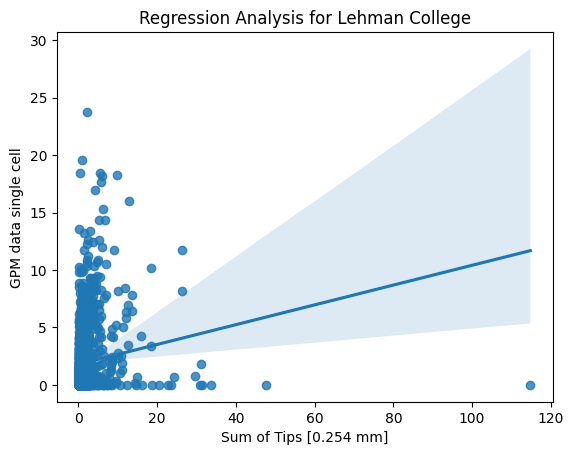

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM data single cell", data = ds)
plt.title("Regression Analysis for Lehman College")

In [ ]:
lm = smf.ols("Q('Sum of Tips [0.254 mm]') ~ Q('GPM data single cell')", data= ds).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Q('Sum of Tips [0.254 mm]')   R-squared:                       0.019
Model:                                     OLS   Adj. R-squared:                  0.019
Method:                          Least Squares   F-statistic:                     24.98
Date:                         Wed, 07 May 2025   Prob (F-statistic):           6.61e-07
Time:                                 16:43:48   Log-Likelihood:                -3771.3
No. Observations:                         1264   AIC:                             7547.
Df Residuals:                             1262   BIC:                             7557.
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.4559      0.161      9.041      0.000       1.140       1.772
Q('GPM data single cell')     0.2254      0.045      4.998      0.000       0.137       0.314
==============================================================================
Omnibus:                     2340.101   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3678760.379
Skew:                          13.018   Prob(JB):                         0.00
Kurtosis:                     266.006   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis for Lehman College')

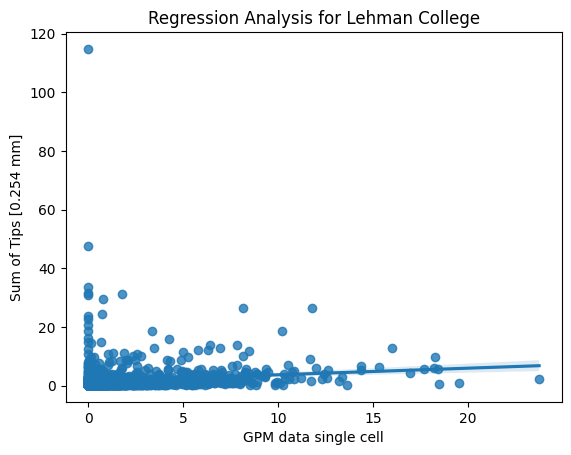

In [ ]:
sns.regplot(x="GPM data single cell", y = "Sum of Tips [0.254 mm]", data = ds)
plt.title("Regression Analysis for Lehman College")

Text(0.5, 1.0, 'Regression Analysis for Lehman College')

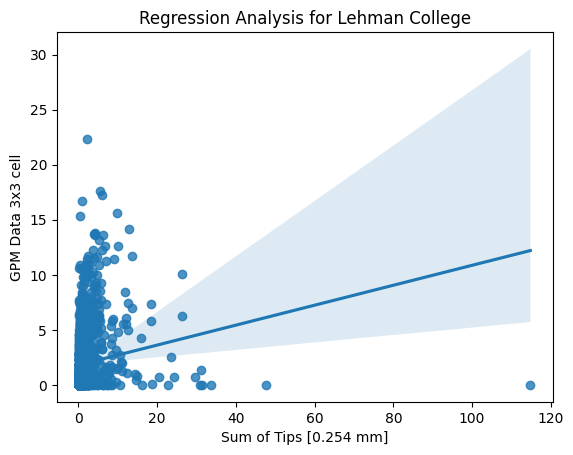

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM Data 3x3 cell", data = ds)
plt.title("Regression Analysis for Lehman College")

In [ ]:
lm = smf.ols("Q('GPM Data 3x3 cell') ~ Q('Sum of Tips [0.254 mm]')", data= ds).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Q('GPM Data 3x3 cell')   R-squared:                       0.024
Model:                                OLS   Adj. R-squared:                  0.023
Method:                     Least Squares   F-statistic:                     31.21
Date:                    Wed, 07 May 2025   Prob (F-statistic):           2.83e-08
Time:                            16:43:49   Log-Likelihood:                -3085.8
No. Observations:                    1264   AIC:                             6176.
Df Residuals:                        1262   BIC:                             6186.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.8071      0.084     21.493      0.000       1.642       1.972
Q('Sum of Tips [0.254 mm]')     0.0906      0.016      5.587      0.000       0.059       0.122
==============================================================================
Omnibus:                      598.338   Durbin-Watson:                   0.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3535.919
Skew:                           2.153   Prob(JB):                         0.00
Kurtosis:                       9.971   Cond. No.                         5.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3x3 data produces a better R-Sqaure when analyzing Lehman's data in its entirety.

#Completing goal: Calculating R-squared for dates

In [ ]:
#creating a column for "Date", that groups all the dates
ds['Date'] = pd.to_datetime(ds['Row Labels']).dt.to_period('D')
ds

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month,Date
0,2023-07-24 14:00:00,0.508,3IMERG.20230724-S133000-E135959.nc4,0.30,0.26,2023-07,2023-07-24
1,2023-07-24 15:30:00,0.508,3IMERG.20230724-S150000-E152959.nc4,0.11,0.06,2023-07,2023-07-24
2,2023-07-25 20:00:00,3.556,3IMERG.20230725-S193000-E195959.nc4,6.14,4.54,2023-07,2023-07-25
3,2023-07-25 20:30:00,3.302,3IMERG.20230725-S200000-E202959.nc4,8.02,7.44,2023-07,2023-07-25
4,2023-07-25 21:00:00,0.508,3IMERG.20230725-S203000-E205959.nc4,6.33,10.86,2023-07,2023-07-25
...,...,...,...,...,...,...,...
1259,2024-11-28 17:00:00,1.270,3IMERG.20241128-S163000-E165959.nc4,4.46,4.13,2024-11,2024-11-28
1260,2024-11-28 17:30:00,1.524,3IMERG.20241128-S170000-E172959.nc4,6.74,5.22,2024-11,2024-11-28
1261,2024-11-28 18:00:00,0.254,3IMERG.20241128-S173000-E175959.nc4,1.55,1.83,2024-11,2024-11-28
1262,2024-11-28 18:30:00,0.254,3IMERG.20241128-S180000-E182959.nc4,0.19,0.16,2024-11,2024-11-28


In [ ]:
Daily_Rsq_values = []

for date in ds['Date'].unique():
    # Filter data for the current date
    daily_data = ds[ds['Date'] == date]

    # Perform linear regression
    daily_model = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data=daily_data).fit()

    # Append the results to the list
    Daily_Rsq_values.append([date, daily_model.rsquared])

results_df = pd.DataFrame(Daily_Rsq_values, columns=['Date', 'R-squared'])

# Set display options to show all rows and columns
#pd.set_option("display.max_rows", None, "display.max_columns", None)
results_df

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py

,Date,R-squared
0,2023-07-24,0.000000
1,2023-07-25,0.290290
2,2023-07-28,NaN
3,2023-07-29,-inf
4,2023-07-30,NaN
...,...,...
153,2024-11-21,0.103337
154,2024-11-22,0.048546
155,2024-11-23,NaN
156,2024-11-26,0.039741


In [ ]:
output_file_path = "Daily_R-squared_values_using_single_cell.txt"
results_df.to_csv(output_file_path, index=False)

In [ ]:
#arranging in descending order
results_df_order = results_df.sort_values(["R-squared"], ascending = False)
results_df_order

,Date,R-squared
133,2024-08-02,1.0
118,2024-06-14,1.0
128,2024-07-17,1.0
111,2024-05-23,1.0
84,2024-03-20,1.0
...,...,...
148,2024-09-27,NaN
149,2024-09-28,NaN
150,2024-09-29,NaN
151,2024-10-07,NaN


In [ ]:
#to excel file
output_file_path = "Daily_R-squared_values_order_single_cell.xlsx"
results_df_order.to_excel(output_file_path, index=False)

In [ ]:
#for daily pixel data
Daily_pix_Rsq_values = []

#loop that calculates the R-square and makes it for as a list
for date in ds['Date'].unique():
    # Filter data for the current date
    daily_data = ds[ds['Date'] == date]

    # Perform linear regression
    daily_pix_model = smf.ols("Q('GPM Data 3x3 cell') ~ Q('Sum of Tips [0.254 mm]')", data=daily_data).fit()

    # Append the results to the list
    Daily_pix_Rsq_values.append([date, daily_model.rsquared])

pix_results_df = pd.DataFrame(Daily_pix_Rsq_values, columns=['Date', 'R-squared'])

# Set display options to show all rows and columns
#pd.set_option("display.max_rows", None, "display.max_columns", None)
pix_results_df

,Date,R-squared
0,2023-07-24,0.00333
1,2023-07-25,0.00333
2,2023-07-28,0.00333
3,2023-07-29,0.00333
4,2023-07-30,0.00333
...,...,...
153,2024-11-21,0.00333
154,2024-11-22,0.00333
155,2024-11-23,0.00333
156,2024-11-26,0.00333


In [ ]:
#descending order
pix_results_df_order = pix_results_df.sort_values(["R-squared"], ascending = False)
pix_results_df_order

,Date,R-squared
0,2023-07-24,0.00333
1,2023-07-25,0.00333
2,2023-07-28,0.00333
3,2023-07-29,0.00333
4,2023-07-30,0.00333
...,...,...
153,2024-11-21,0.00333
154,2024-11-22,0.00333
155,2024-11-23,0.00333
156,2024-11-26,0.00333


In [ ]:
output_file_path = "Daily_R-squared_values_order_3x3_cell.xlsx"
pix_results_df_order.to_excel(output_file_path, index=False)

In [ ]:
#creating a linear regression model that compares the sum of each date's sum of tips and gpm data
#summing dates
daily_sum = ds.groupby('Date')[['Sum of Tips [0.254 mm]', 'GPM data single cell','GPM Data 3x3 cell']].sum()
#pd.set_option("display.max_rows", None, "display.max_columns", None)
daily_sum

,Sum of Tips [0.254 mm],GPM data single cell,GPM Data 3x3 cell
Date,,,
2023-07-24,1.016,0.41,0.32
2023-07-25,7.620,34.10,30.36
2023-07-28,8.890,4.13,5.98
2023-07-29,0.508,0.18,2.04
2023-07-30,0.254,0.00,0.00
...,...,...,...
2024-11-21,23.622,23.88,23.99
2024-11-22,30.480,5.65,4.46
2024-11-23,30.988,0.00,0.00


In [ ]:
daily_sum_3x3_lm = smf.ols("Q('GPM Data 3x3 cell') ~ Q('Sum of Tips [0.254 mm]')", data= daily_sum).fit()
daily_sum_3x3_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Q('GPM Data 3x3 cell')   R-squared:                       0.445
Model:                                OLS   Adj. R-squared:                  0.442
Method:                     Least Squares   F-statistic:                     125.3
Date:                    Wed, 07 May 2025   Prob (F-statistic):           1.02e-21
Time:                            16:43:51   Log-Likelihood:                -703.32
No. Observations:                     158   AIC:                             1411.
Df Residuals:                         156   BIC:                             1417.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.1980      2.008      1.592      0.113      -0.769       7.165
Q('Sum of Tips [0.254 mm]')     0.8321      0.074     11.193      0.000       0.685       0.979
==============================================================================
Omnibus:                       37.521   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.475
Skew:                           0.488   Prob(JB):                     4.65e-67
Kurtosis:                       9.741   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
daily_sum_sc_lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= daily_sum).fit()
daily_sum_sc_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.444
Model:                                   OLS   Adj. R-squared:                  0.440
Method:                        Least Squares   F-statistic:                     124.5
Date:                       Wed, 07 May 2025   Prob (F-statistic):           1.25e-21
Time:                               16:43:51   Log-Likelihood:                -703.21
No. Observations:                        158   AIC:                             1410.
Df Residuals:                            156   BIC:                             1417.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.1028      2.007      1.546      0.124      -0.861       7.067
Q('Sum of Tips [0.254 mm]')     0.8291      0.074     11.160      0.000       0.682       0.976
==============================================================================
Omnibus:                       36.569   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.119
Skew:                           0.466   Prob(JB):                     2.24e-64
Kurtosis:                       9.607   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='Sum of Tips [0.254 mm]', ylabel='GPM Data 3x3 cell'>

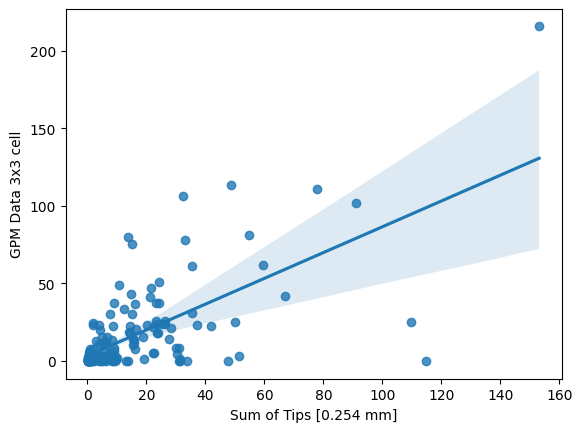

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]",y = "GPM Data 3x3 cell" ,data = daily_sum)
#

<Axes: xlabel='Sum of Tips [0.254 mm]', ylabel='GPM data single cell'>

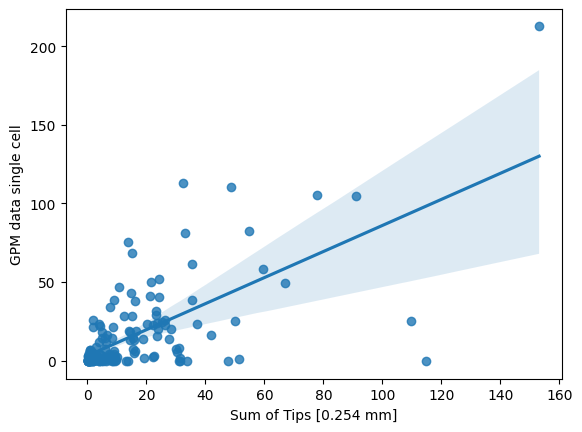

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]",y = "GPM data single cell" ,data = daily_sum)
#sns.regplot(x="GPM data", y = "Sum of Tips [0.254 mm]", data = daily_sum)


# **Below is using filtered data for dates that see a minimum consecutive of  3 rainfall events**

In [ ]:
#deleting dates within ds that do not experience 3 consecutive rainfall events
#b/c r-square requires a minimum of 2 data points

# Grouping data by 'Date' and count data points for each date
date_counts = ds.groupby('Date')['Row Labels'].count()

# Filter dates with less than 3 data points
dates_to_keep = date_counts[date_counts >= 3].index

# creating a new dataframe with dates a minimum of 3 data points
new_ds = ds[ds['Date'].isin(dates_to_keep)]
#pd.set_option("display.max_rows", None, "display.max_columns", None)

new_ds

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month,Date
2,2023-07-25 20:00:00,3.556,3IMERG.20230725-S193000-E195959.nc4,6.14,4.54,2023-07,2023-07-25
3,2023-07-25 20:30:00,3.302,3IMERG.20230725-S200000-E202959.nc4,8.02,7.44,2023-07,2023-07-25
4,2023-07-25 21:00:00,0.508,3IMERG.20230725-S203000-E205959.nc4,6.33,10.86,2023-07,2023-07-25
5,2023-07-25 21:30:00,0.254,3IMERG.20230725-S210000-E212959.nc4,13.61,7.52,2023-07,2023-07-25
9,2023-08-07 09:00:00,0.254,3IMERG.20230807-S083000-E085959.nc4,0.00,0.40,2023-08,2023-08-07
...,...,...,...,...,...,...,...
1259,2024-11-28 17:00:00,1.270,3IMERG.20241128-S163000-E165959.nc4,4.46,4.13,2024-11,2024-11-28
1260,2024-11-28 17:30:00,1.524,3IMERG.20241128-S170000-E172959.nc4,6.74,5.22,2024-11,2024-11-28
1261,2024-11-28 18:00:00,0.254,3IMERG.20241128-S173000-E175959.nc4,1.55,1.83,2024-11,2024-11-28
1262,2024-11-28 18:30:00,0.254,3IMERG.20241128-S180000-E182959.nc4,0.19,0.16,2024-11,2024-11-28


In [ ]:
new_ds.describe()

,Row Labels,Sum of Tips [0.254 mm],GPM data single cell,GPM Data 3x3 cell
count,1200,1200.000000,1200.000000,1200.000000
mean,2024-02-12 02:28:01.500000,1.670262,1.979708,1.999567
min,2023-07-25 20:00:00,0.254000,0.000000,0.000000
25%,2023-10-20 13:52:30,0.254000,0.000000,0.050000
50%,2024-01-25 10:45:00,0.762000,0.725000,0.810000
75%,2024-05-05 22:07:30,1.778000,2.702500,2.810000
max,2024-11-28 21:00:00,29.718000,23.740000,22.360000
std,NaN,2.926478,2.986016,2.806749


In [ ]:
monthly_sum = new_ds.groupby('Month')[['Sum of Tips [0.254 mm]', 'GPM data single cell', 'GPM Data 3x3 cell']].sum()
monthly_sum

,Sum of Tips [0.254 mm],GPM data single cell,GPM Data 3x3 cell
Month,,,
2023-07,7.620,34.10,30.36
2023-08,135.128,181.51,196.14
2023-09,407.162,411.66,406.98
2023-10,124.460,114.10,111.54
2023-11,78.740,112.40,117.16
2023-12,193.040,429.85,425.83
2024-01,136.652,210.09,206.07
2024-02,37.846,33.01,35.25
2024-03,228.346,339.04,345.88


Text(0.5, 1.0, 'Total Rainfall by Month at Lehman College')

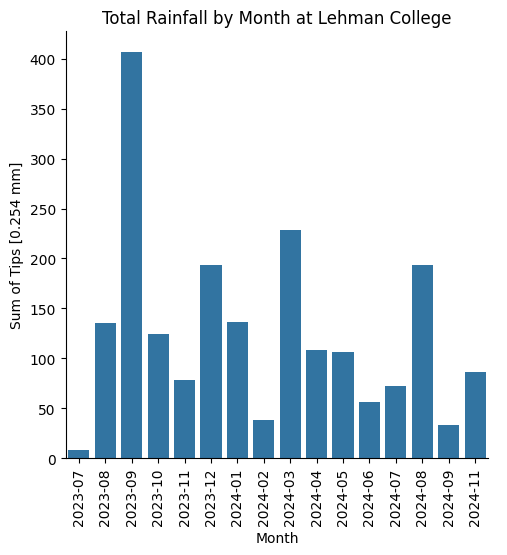

In [ ]:
Lehman_tot = sns.catplot(x = 'Month', y = 'Sum of Tips [0.254 mm]', data = monthly_sum, kind = 'bar')
Lehman_tot.set_xticklabels(rotation = 90)
plt.title('Total Rainfall by Month at Lehman College')

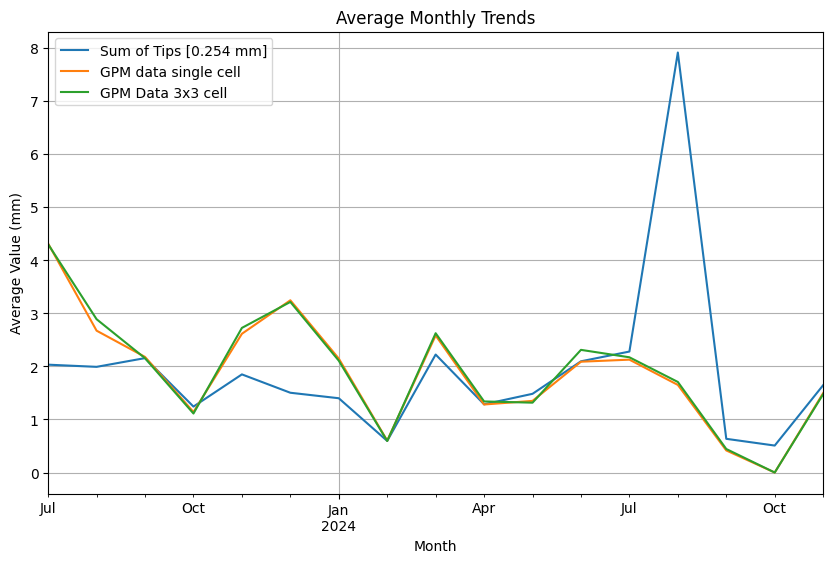

In [ ]:
monthly_avg = ds.groupby('Month')[['Sum of Tips [0.254 mm]', 'GPM data single cell', 'GPM Data 3x3 cell']].mean()
monthly_avg.plot(kind='line', figsize=(10, 6))
plt.title('Average Monthly Trends')
plt.xlabel('Month')
plt.ylabel('Average Value (mm)')
plt.grid(True)
plt.show()

In [ ]:
monthly_avg

,Sum of Tips [0.254 mm],GPM data single cell,GPM Data 3x3 cell
Month,,,
2023-07,2.032000,4.313333,4.300000
2023-08,1.990912,2.672647,2.888382
2023-09,2.155640,2.178095,2.153333
2023-10,1.242337,1.139802,1.111782
2023-11,1.848884,2.613953,2.724651
2023-12,1.502992,3.245113,3.214060
2024-01,1.399592,2.147347,2.106939
2024-02,0.595194,0.601791,0.594627
2024-03,2.222977,2.582105,2.624436


In [ ]:
consecutive_Rsq_values = []

for date in new_ds['Date'].unique():
    # Filter data for the current date
    consecutive_data = new_ds[new_ds['Date'] == date] #understanding this

    # Perform linear regression
    consecutive_model = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data=consecutive_data).fit()

    # Append the results to the list
    consecutive_Rsq_values.append([date, consecutive_model.rsquared])

results_df = pd.DataFrame(consecutive_Rsq_values, columns=['Date', 'R-squared'])

# Set display options to show all rows and columns
#pd.set_option("display.max_rows", None, "display.max_columns", None)
results_df

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1

,Date,R-squared
0,2023-07-25,0.290290
1,2023-08-07,0.679520
2,2023-08-08,0.772260
3,2023-08-10,0.008275
4,2023-08-13,0.109714
...,...,...
106,2024-11-11,0.000018
107,2024-11-21,0.103337
108,2024-11-22,0.048546
109,2024-11-26,0.039741


In [ ]:
#arranging in descending order
results_df_order = results_df.sort_values(["R-squared"], ascending = False)
results_df_order

,Date,R-squared
67,2024-03-29,0.970353
85,2024-05-30,0.943796
87,2024-06-07,0.917829
77,2024-05-05,0.814360
101,2024-08-30,0.792404
...,...,...
56,2024-02-17,NaN
99,2024-08-12,NaN
102,2024-09-07,NaN
104,2024-09-28,NaN


In [ ]:
output_file_path = "Dates_R-squared_values_order_sc_cell.xlsx"
results_df_order.to_excel(output_file_path, index=False)

In [ ]:
date_counts=new_ds.groupby('Date')['Row Labels'].count()
date_counts

,Row Labels
Date,
2023-07-25,4
2023-08-07,9
2023-08-08,3
2023-08-10,8
2023-08-13,7
...,...
2024-11-11,10
2024-11-21,21
2024-11-22,13


In [ ]:
checking = consecutive_data.groupby('Date')['Row Labels'].count()
checking

,Row Labels
Date,
2024-11-28,19


In [ ]:
#let's see if get filter for only dates with 3 consecutive 30 minute intervals with rainfall

In [ ]:
consecutive_3x3_Rsq_values = []

for date in new_ds['Date'].unique():
    # Filter data for the current date
    consecutive_data = new_ds[new_ds['Date'] == date] #understanding this

    # Perform linear regression
    consecutive_3x3_model = smf.ols("Q('GPM Data 3x3 cell') ~ Q('Sum of Tips [0.254 mm]')", data=consecutive_data).fit()

    # Append the results to the list
    consecutive_3x3_Rsq_values.append([date, consecutive_3x3_model.rsquared])

results_3x3_df = pd.DataFrame(consecutive_3x3_Rsq_values, columns=['Date', 'R-squared'])
results_3x3_df

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1

,Date,R-squared
0,2023-07-25,0.502087
1,2023-08-07,0.669708
2,2023-08-08,0.823401
3,2023-08-10,0.000044
4,2023-08-13,0.218633
...,...,...
106,2024-11-11,0.000205
107,2024-11-21,0.172946
108,2024-11-22,0.103838
109,2024-11-26,0.039369


In [ ]:
results_3x3_df_order = results_3x3_df.sort_values(["R-squared"], ascending = False)
results_3x3_df_order

,Date,R-squared
73,2024-04-15,0.996079
67,2024-03-29,0.968894
89,2024-06-30,0.923552
12,2023-09-08,0.897969
77,2024-05-05,0.878142
...,...,...
56,2024-02-17,NaN
75,2024-04-18,NaN
99,2024-08-12,NaN
102,2024-09-07,NaN


In [ ]:
output_file_path = "Dates_R-squared_values_order_3x3_cell.xlsx"
results_3x3_df_order.to_excel(output_file_path, index=False)

In [ ]:
sc_lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= new_ds).fit()
sc_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.073
Model:                                   OLS   Adj. R-squared:                  0.073
Method:                        Least Squares   F-statistic:                     94.97
Date:                       Wed, 07 May 2025   Prob (F-statistic):           1.20e-21
Time:                               16:43:55   Log-Likelihood:                -2969.2
No. Observations:                       1200   AIC:                             5942.
Df Residuals:                           1198   BIC:                             5953.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.5178      0.096     15.879      0.000       1.330       1.705
Q('Sum of Tips [0.254 mm]')     0.2765      0.028      9.745      0.000       0.221       0.332
==============================================================================
Omnibus:                      609.732   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4461.284
Skew:                           2.252   Prob(JB):                         0.00
Kurtosis:                      11.303   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis for Lehman College')

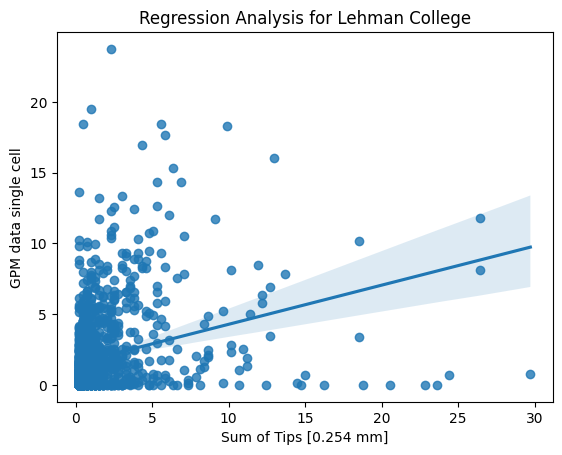

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM data single cell", data = new_ds)
plt.title("Regression Analysis for Lehman College")

In [ ]:
pix_lm=smf.ols("Q('GPM Data 3x3 cell') ~ Q('Sum of Tips [0.254 mm]')", data= new_ds).fit()
pix_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Q('GPM Data 3x3 cell')   R-squared:                       0.087
Model:                                OLS   Adj. R-squared:                  0.087
Method:                     Least Squares   F-statistic:                     114.8
Date:                    Wed, 07 May 2025   Prob (F-statistic):           1.22e-25
Time:                            16:43:55   Log-Likelihood:                -2885.8
No. Observations:                    1200   AIC:                             5776.
Df Residuals:                        1198   BIC:                             5786.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.5259      0.089     17.113      0.000       1.351       1.701
Q('Sum of Tips [0.254 mm]')     0.2836      0.026     10.713      0.000       0.232       0.336
==============================================================================
Omnibus:                      537.435   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3097.201
Skew:                           2.016   Prob(JB):                         0.00
Kurtosis:                       9.759   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis for Lehman College')

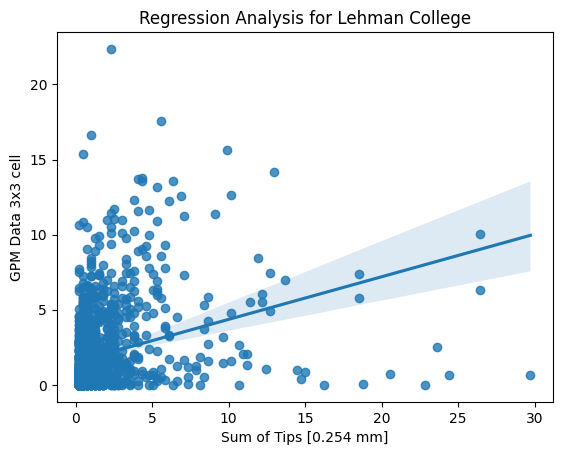

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM Data 3x3 cell", data = new_ds)
plt.title("Regression Analysis for Lehman College")

# Working with Consecutive data

how can I filter so that only 'row labels' with a minimum 3 consecutive intervals show. be mindlful that the row labels columns consists of date/timestamps; where the timestamp is a 30 minute interval

In [ ]:
# Assuming 'ds' is your DataFrame and 'Row Labels' is your column with date/timestamps

# Convert 'Row Labels' to datetime objects if not already
ds['Row Labels'] = pd.to_datetime(ds['Row Labels'])

# Group by date and get consecutive groups
groups = ds.groupby(ds['Row Labels'].dt.date)['Row Labels'].diff().ne(pd.Timedelta(minutes=30)).cumsum()
# Detailed explanation is below

# Filter groups with at least 3 consecutive intervals
consecutive_ds = ds[ds.groupby(groups)['Row Labels'].transform('size') >= 3]
pd.set_option("display.max_rows", None, "display.max_columns", None)
consecutive_ds

,Row Labels,Sum of Tips [0.254 mm],IMERG filename,GPM data single cell,GPM Data 3x3 cell,Month,Date
2,2023-07-25 20:00:00,3.556,3IMERG.20230725-S193000-E195959.nc4,6.14,4.54,2023-07,2023-07-25
3,2023-07-25 20:30:00,3.302,3IMERG.20230725-S200000-E202959.nc4,8.02,7.44,2023-07,2023-07-25
4,2023-07-25 21:00:00,0.508,3IMERG.20230725-S203000-E205959.nc4,6.33,10.86,2023-07,2023-07-25
5,2023-07-25 21:30:00,0.254,3IMERG.20230725-S210000-E212959.nc4,13.61,7.52,2023-07,2023-07-25
9,2023-08-07 09:00:00,0.254,3IMERG.20230807-S083000-E085959.nc4,0.00,0.40,2023-08,2023-08-07
10,2023-08-07 09:30:00,0.508,3IMERG.20230807-S090000-E092959.nc4,0.71,0.80,2023-08,2023-08-07
11,2023-08-07 10:00:00,3.810,3IMERG.20230807-S093000-E095959.nc4,2.46,3.24,2023-08,2023-08-07
12,2023-08-07 10:30:00,4.572,3IMERG.20230807-S100000-E102959.nc4,4.89,4.61,2023-08,2023-08-07
13,2023-08-07 11:00:00,12.192,3IMERG.20230807-S103000-E105959.nc4,6.32,6.06,2023-08,2023-08-07
14,2023-08-07 11:30:00,3.302,3IMERG.20230807-S110000-E112959.nc4,5.47,4.90,2023-08,2023-08-07


**Explanation for the code above used to filter for Rainfall event.**
  
*  ds['Row Labels'].dt.date: This extracts just the date part from each timestamp in the 'Row Labels' column. The data is then grouped by these dates.

* diff(): Within each date group, this calculates the time difference between consecutive timestamps.

* .ne(pd.Timedelta(minutes=30)): This checks if the time difference is not equal to 30 minutes. This is how we identify breaks in the 30-minute intervals. When the difference is not 30 minutes, it marks the start of a new consecutive sequence.

* .cumsum(): This performs a cumulative sum. Each time a break in the 30-minute interval is detected (where .ne() is True), the cumulative sum increases. This creates unique group identifiers for each set of consecutive 30-minute intervals within a day.

* ['Row Labels'].transform('size'): Within each of these groups, this calculates the number of rows (the 'size' of the group), effectively counting how many consecutive 30-minute intervals are in that group. The transform method ensures that this size is returned for each row in the original DataFrame, aligned with its corresponding group.



In [ ]:
output_file_path = "Rain_Event_2023-2024_Lehman_College.xlsx"
consecutive_ds.to_excel(output_file_path, index=False)

In [ ]:
consecutive_ds.describe()

,Row Labels,Sum of Tips [0.254 mm],GPM data single cell,GPM Data 3x3 cell
count,945,945.000000,945.000000,945.000000
mean,2024-02-08 04:58:19.047618816,1.844658,2.394540,2.416042
min,2023-07-25 20:00:00,0.254000,0.000000,0.000000
25%,2023-10-14 21:30:00,0.254000,0.030000,0.170000
50%,2024-01-10 03:30:00,0.762000,1.210000,1.330000
75%,2024-04-12 07:30:00,2.032000,3.530000,3.600000
max,2024-11-28 18:30:00,29.718000,23.740000,22.360000
std,NaN,2.969853,3.209381,2.992989


In [ ]:
date_counts=consecutive_ds.groupby('Date')['Row Labels'].count()
#pd.set_option("display.max_rows", None, "display.max_columns", None)
date_counts

,Row Labels
Date,
2023-07-25,4
2023-08-07,7
2023-08-08,3
2023-08-10,6
2023-08-13,4
...,...
2024-11-11,10
2024-11-21,20
2024-11-22,11


In [ ]:
date_counts = date_counts.sort_values(ascending = False)
date_counts

,Row Labels
Date,
2023-12-18,34
2023-09-29,33
2023-09-18,29
2024-03-23,28
2023-12-11,27
...,...
2024-04-17,3
2024-04-15,3
2024-08-30,3


In [ ]:
monthly_con_sum = consecutive_ds.groupby('Month')[['Sum of Tips [0.254 mm]', 'GPM data single cell', 'GPM Data 3x3 cell']].sum()
monthly_con_sum

,Sum of Tips [0.254 mm],GPM data single cell,GPM Data 3x3 cell
Month,,,
2023-07,7.620,34.10,30.36
2023-08,119.126,174.85,188.52
2023-09,391.160,398.01,388.35
2023-10,108.458,103.89,103.13
2023-11,75.184,109.92,114.31
2023-12,186.690,419.04,416.67
2024-01,106.172,205.38,201.60
2024-02,30.480,29.17,30.77
2024-03,213.868,326.83,334.37


Text(0.5, 1.0, 'Total Rainfall during Rain Events by Month at Lehman College')

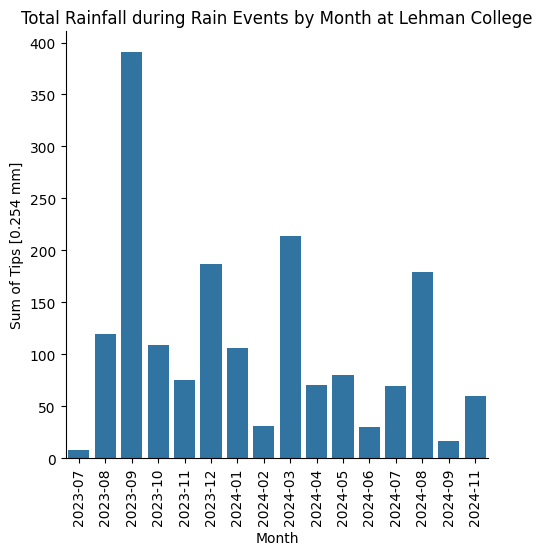

In [ ]:
Lehman_tot = sns.catplot(x = 'Month', y = 'Sum of Tips [0.254 mm]', data = monthly_con_sum, kind = 'bar')
Lehman_tot.set_xticklabels(rotation = 90)
plt.title('Total Rainfall during Rain Events by Month at Lehman College')

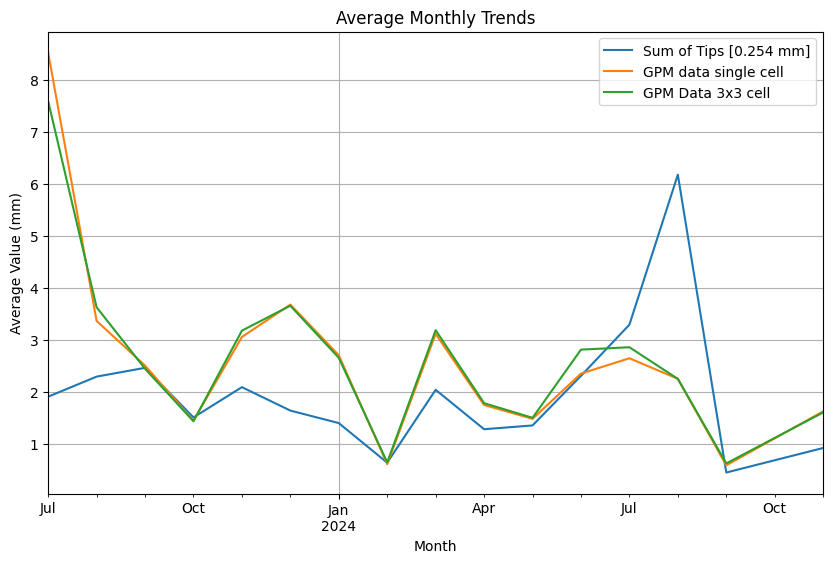

In [ ]:
monthly_con_avg = consecutive_ds.groupby('Month')[['Sum of Tips [0.254 mm]', 'GPM data single cell', 'GPM Data 3x3 cell']].mean()
monthly_con_avg.plot(kind='line', figsize=(10, 6))
plt.title('Average Monthly Trends')
plt.xlabel('Month')
plt.ylabel('Average Value (mm)')
plt.grid(True)
plt.show()

In [ ]:
monthly_con_avg

,Sum of Tips [0.254 mm],GPM data single cell,GPM Data 3x3 cell
Month,,,
2023-07,1.905000,8.525000,7.590000
2023-08,2.290885,3.362500,3.625385
2023-09,2.460126,2.503208,2.442453
2023-10,1.506361,1.442917,1.432361
2023-11,2.088444,3.053333,3.175278
2023-12,1.637632,3.675789,3.655000
2024-01,1.397000,2.702368,2.652632
2024-02,0.635000,0.607708,0.641042
2024-03,2.036838,3.112667,3.184476


In [ ]:
#code below makes a list then a loop that calculates the R-squared for each date in our consecutive data
consecutive_Rsq_values = []

for date in consecutive_ds['Date'].unique():
    # Filter data for the current date
    consecutive_data = consecutive_ds[consecutive_ds['Date'] == date]
# This line filters the consecutive_ds DataFrame. It selects only the rows where the value in
# the Date column matches the current date from the loop. The resulting subset of data for that
#specific date is stored in a new DataFrame called consecutive_data.

    # Perform linear regression that calculates the R-square value
    consecutive_model = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data=consecutive_data).fit()

    # Append the results to the list
    consecutive_Rsq_values.append([date, consecutive_model.rsquared])

con_results_df = pd.DataFrame(consecutive_Rsq_values, columns=['Date', 'R-squared'])

# Set display options to show all rows and columns
#pd.set_option("display.max_rows", None, "display.max_columns", None)
con_results_df

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1

,Date,R-squared
0,2023-07-25,0.290290
1,2023-08-07,0.629379
2,2023-08-08,0.772260
3,2023-08-10,0.018020
4,2023-08-13,0.077839
...,...,...
91,2024-11-11,0.000018
92,2024-11-21,0.098406
93,2024-11-22,0.533355
94,2024-11-26,0.002924


In [ ]:
con_results_df = con_results_df.sort_values(["R-squared"], ascending = False)
#pd.set_option("display.max_rows", None, "display.max_columns", None)
con_results_df

,Date,R-squared
75,2024-05-30,0.942229
69,2024-04-20,0.924015
70,2024-05-05,0.816868
87,2024-08-30,0.792404
5,2023-08-15,0.791764
...,...,...
42,2024-01-07,NaN
50,2024-02-13,NaN
51,2024-02-17,NaN
89,2024-09-28,NaN


In [ ]:
output_file_path = "Consecutive_Dates_R-squared_values_order_sc_cell.xlsx"
con_results_df.to_excel(output_file_path, index=False)

In [ ]:
consec_sc_lm = smf.ols("Q('GPM data single cell') ~ Q('Sum of Tips [0.254 mm]')", data= consecutive_ds).fit()
consec_sc_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Q('GPM data single cell')   R-squared:                       0.078
Model:                                   OLS   Adj. R-squared:                  0.077
Method:                        Least Squares   F-statistic:                     79.41
Date:                       Wed, 07 May 2025   Prob (F-statistic):           2.56e-18
Time:                               16:43:58   Log-Likelihood:                -2404.1
No. Observations:                        945   AIC:                             4812.
Df Residuals:                            943   BIC:                             4822.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.8390      0.118     15.570      0.000       1.607       2.071
Q('Sum of Tips [0.254 mm]')     0.3012      0.034      8.911      0.000       0.235       0.367
==============================================================================
Omnibus:                      420.872   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2361.582
Skew:                           1.989   Prob(JB):                         0.00
Kurtosis:                       9.645   Cond. No.                         4.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis for Lehman College')

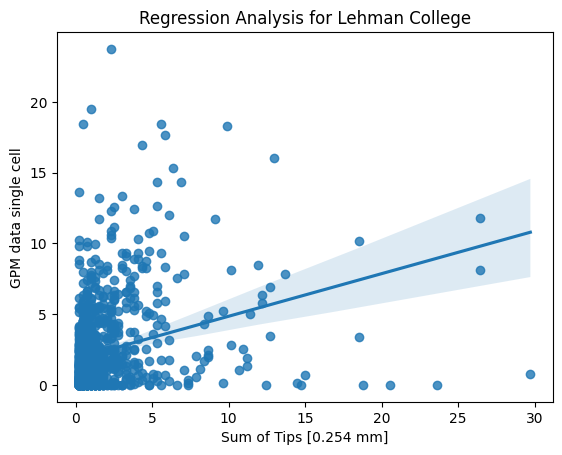

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM data single cell", data = consecutive_ds)
plt.title("Regression Analysis for Lehman College")

In [ ]:
consecutive_3x3_Rsq_values = []

for date in consecutive_ds['Date'].unique():
    # Filter data for the current date
    consecutive_data = consecutive_ds[consecutive_ds['Date'] == date] #understanding this

    # Perform linear regression
    consecutive_3x3_model = smf.ols("Q('GPM Data 3x3 cell') ~ Q('Sum of Tips [0.254 mm]')", data=consecutive_data).fit()

    # Append the results to the list
    consecutive_3x3_Rsq_values.append([date, consecutive_3x3_model.rsquared])

con_results_3x3_df = pd.DataFrame(consecutive_3x3_Rsq_values, columns=['Date', 'R-squared'])
con_results_3x3_df

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1

,Date,R-squared
0,2023-07-25,0.502087
1,2023-08-07,0.638435
2,2023-08-08,0.823401
3,2023-08-10,0.055357
4,2023-08-13,0.302538
...,...,...
91,2024-11-11,0.000205
92,2024-11-21,0.166788
93,2024-11-22,0.526664
94,2024-11-26,0.000306


In [ ]:
con_results_3x3_df_order = results_3x3_df.sort_values(["R-squared"], ascending = False)
#pd.set_option("display.max_rows", None, "display.max_columns", None)
con_results_3x3_df_order

,Date,R-squared
73,2024-04-15,0.996079
67,2024-03-29,0.968894
89,2024-06-30,0.923552
12,2023-09-08,0.897969
77,2024-05-05,0.878142
...,...,...
56,2024-02-17,NaN
75,2024-04-18,NaN
99,2024-08-12,NaN
102,2024-09-07,NaN


In [ ]:
output_file_path = "Consecutive_Dates_R-squared_values_order_3x3_cell.xlsx"
con_results_3x3_df_order.to_excel(output_file_path, index=False)

In [ ]:
pix_lm=smf.ols("Q('GPM Data 3x3 cell') ~ Q('Sum of Tips [0.254 mm]')", data= consecutive_ds).fit()
pix_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Q('GPM Data 3x3 cell')   R-squared:                       0.096
Model:                                OLS   Adj. R-squared:                  0.095
Method:                     Least Squares   F-statistic:                     100.1
Date:                    Wed, 07 May 2025   Prob (F-statistic):           1.86e-22
Time:                            16:43:59   Log-Likelihood:                -2328.7
No. Observations:                     945   AIC:                             4661.
Df Residuals:                         943   BIC:                             4671.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.8403      0.109     16.875      0.000       1.626       2.054
Q('Sum of Tips [0.254 mm]')     0.3121      0.031     10.003      0.000       0.251       0.373
==============================================================================
Omnibus:                      370.406   Durbin-Watson:                   0.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1691.414
Skew:                           1.790   Prob(JB):                         0.00
Kurtosis:                       8.491   Cond. No.                         4.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Regression Analysis for Lehman College')

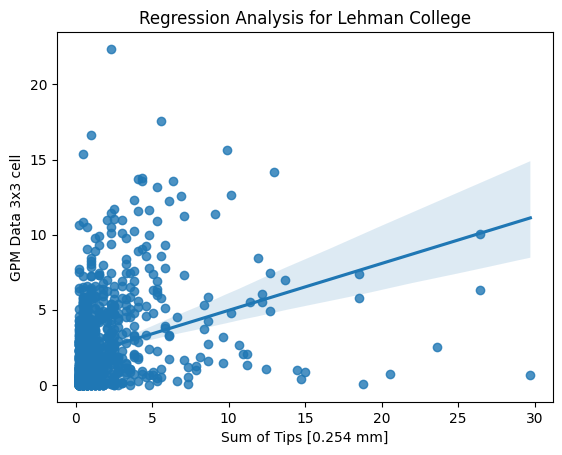

In [ ]:
sns.regplot(x="Sum of Tips [0.254 mm]", y = "GPM Data 3x3 cell", data = consecutive_ds)
plt.title("Regression Analysis for Lehman College")